# Regression Predict - 2301FTDS_Team_GM4_#TheOutliers

© Explore Data Science Academy

---
### Honour Code

I {**Kobus le Roux, Ayanda Shilakoe, Prayer Lungile Nkuna, Fikile Lubambo, Karabo Hlatswayo, Esethu Mpetshwa**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 


<a id="cont"></a>

## Table of Contents
<a href=#one>1. Introduction</a>

<a href=#two>2. Importing Packages</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Data Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

<a href=#nine>9. Appendix A: Model Deployment via API</a>

 <a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

The provision of electricity plays a significant role in the well-being of most, if not all citizens within a nation. Electricity serves multiple purposes, such as keeping us connected, providing warmth, and enabling us to provide for our families. Consequently, it is essential to ensure a consistent power supply in order to maintain and enhance living standards by investing in electricity infrastructure. However, recent years have revealed evidence indicating that relying solely on non-renewable sources is not environmentally sustainable.

The Spanish government is contemplating an expansion of investments in renewable energy resources. Consequently, they require information regarding the trends and patterns of renewable and fossil fuel energy generation in the country. To fulfill this purpose, the Spanish government has been monitoring the various energy sources available within their borders.

The purpose of this document is to investigate and model the difference between energy generated through fossil fuels and various renewable sources in Spain. This disparity, referred to as the target variable, will be modeled based on city-specific weather features, including pressure, wind speed, humidity, and more, on a daily basis.


**The Dataset:**

The dataset provided to accomplish this goal contains information about the weather conditions in various Spanish cities: Madrid, Valencia, Seville, Bilbao and Barcelona. The dataset also contains the three hour load shortfall (`load_shortfall_3h`), defined as the difference between the energy generated by the method of renewable energy sources, such as solar, wind, geothermal, etc., and energy generated with fossil fuels - partitioned in three-hour windows. All the data was collected between the years 2015 and 2017

 <a id="two"></a>
## 2. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we will import and briefly discuss the libraries that will be used throughout our analysis and modelling. We will also set some display options and styles for certain packages|

---

In [699]:
# Libraries for data loading, data manipulation and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries that helps with statistical methods and visualizations
from  scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import norm

# Libraries for data preparation and model building
from sklearn import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor

# Miscellaneous libraries also used throughout notebook
import pickle
import calendar
import re
# Ignore filterwarnings
import warnings
warnings.filterwarnings('ignore')

# Setting global constants to ensure notebook results are reproducible
TRAIN_TEST_VAR = 0.2 #Variable indicating the ratio of Training to Testing data when splitting datasets for validation
K_FOLD = 10 #Variable used during k-fold validation processes


# Setting display options and styles for "Pandas" and "Seaborne" libraries
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
sns.set_style('whitegrid')


It would also be beneficial to write a quick function for calculating the Root Mean Square Error, which will be used when assessing model performance:

In [556]:
# Function that returns the RMSE
def rmse(y_real, y_predicted):
    return np.sqrt(mean_squared_error(y_real, y_predicted))

<a id="three"></a>
## 3. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section, the datasets is loaded form cdv files into pandas dataframes. The `df_train.csv` file will be used to train and validate our data, where `df_test.csv` will be used to test our final predictions. |

---

In [557]:
df_train = pd.read_csv('df_train.csv') #Dataframe for training models
df_test = pd.read_csv("df_test.csv") #Dataframe for testing model predictions

<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we will perform an exploratory data analysis on the datasets obtained from the client. We will look at how the predictor variables relates and correlates to each other, as well as our target variable `load_shortfall_3h`|

---


### 4.1. Preview Data

Let's first get a sense of how the datasets that we will be working with presents by displaying the first five rows of our dataframe: 

In [558]:
# Print first 5 rows of training dataframe
df_train.head(5)

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h Seville_pressure  Seville_rain_1h  Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  Madrid_temp_min  load_shortfall_3h
0           0  2015-01-01 03:00:00           0.666667           level_5             0.0             0.666667         74.333333        64.000000                0.0           1.000000                 0.0       223.333333              6.333333           42.666667                0.0            3.333333                0.0             sp25              0.0             0.0         1036.333333              0.0             0.0                0.0               0.0              800.0                 800.0      1035.000000               800.0        1002.666667        274.254667       971.333333         269.888000     269.888000              800.0    274.254667          75.666667         269.888000          281.013000       265.938000      281.013000       269.338615   269.338615          281.013000       269.338615        274.254667   265.938000       265.938000        6715.666667
1           1  2015-01-01 06:00:00           0.333333          level_10             0.0             1.666667         78.333333        64.666667                0.0           1.000000                 0.0       221.000000              4.000000          139.000000                0.0            3.333333                0.0             sp25              0.0             0.0         1037.333333              0.0             0.0                0.0               0.0              800.0                 800.0      1035.666667               800.0        1004.333333        274.945000       972.666667         271.728333     271.728333              800.0    274.945000          71.000000         271.728333          280.561667       266.386667      280.561667       270.376000   270.376000          280.561667       270.376000        274.945000   266.386667       266.386667        4171.666667
2           2  2015-01-01 09:00:00           1.000000           level_9             0.0             1.000000         71.333333        64.333333                0.0           1.000000                 0.0       214.333333              2.000000          326.000000                0.0            2.666667                0.0             sp25              0.0             0.0         1038.000000              0.0             0.0                0.0               0.0              800.0                 800.0      1036.000000               800.0        1005.333333        278.792000       974.000000         278.008667     278.008667              800.0    278.792000          65.666667         278.008667          281.583667       272.708667      281.583667       275.027229   275.027229          281.583667       275.027229        278.792000   272.708667       272.708667        4274.666667
3           3  2015-01-01 12:00:00           1.000000           level_8             0.0             1.000000         65.333333        56.333333                0.0           1.000000                 0.0       199.666667              2.333333          273.000000                0.0            4.000000                0.0             sp25              0.0             0.0         1037.000000              0.0             0.0                0.0               0.0             

From the dataframe above, we note the following: 
* There exists a `Unnamed: 0` column that seems to echo the index of our dataframe
* There exists a `time` column which seems to display the date and time when the remaining data was collected
* There exists a large number of variables related to the weather in different cities around Spain
* Lastly, all of the predictor variables included above is preceded by our target variable `load_shortfall_3h`, which forms the last column of our dataframe


Next, lets investigate the data-types stored in each column by viewing a summary of the dataframe:

In [559]:
# Print overview of data in the training dataframe:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

From the above summary, we obtain yet again some important information regarding our data:

* All our data is in numeric form, with the exception of `time`, `Valencia_wind_deg` and `Seville_pressure`
* There are 8736 entries in our data
* There is 49 columns of data, including our target variable `load_shortfall_3h`
* Lastly, a keen eye might pick up on the fact that `Valencia_pressure` is the only column that has fewer non-null values, indicating that we might have some missing data for that variable

In order to perform a quality EDA, we will need to do some housekeeping on our dataframe. 

**NB: PLEASE NOTE THAT ALL OF THE FOLLOWING CHANGES MADE TO THE DATA IN THIS SECTION IS ONLY TO ENHANCE OUR EXPLORATORY DATA ANALYSIS, AND WILL BE DISCARDED BY THE END OF THIS SECTION. THE DATA ENGINEERING SECTION IN THIS NOTEBOOK COVERS THE CHANGES MADE IN ORDER TO TRAIN EFFICIENT MODELS**

<a href=#five>Jump to "Data Engineering section"</a>

First, let's drop the redundant column `Unnamed: 0`, since it does not contribute anything meaningful to the data. Also, it is good practice to de-capitalize the variables in our data, for the sake of consistency, as well as   in order to help identify them as such more easily

In [560]:
# Drop redundant index column
df_train.drop(columns ={'Unnamed: 0'}, 
        inplace=True)

# Lowercase all column titles
df_train.columns = df_train.columns.str.lower()

Next, we can focus on converting some of our non-numeric variables into a format we might use. First, let us convert the `time` column to be a "datetime" object:


In [561]:
# Convert time column from object to timestamp
df_train['time'] = pd.to_datetime(df_train['time'])

# Verify that the change has occured by printing the datatype for the first `time` value
print(type(df_train['time'].values[0]))

<class 'numpy.datetime64'>


Let us look how making that change has affected the dataframe:

In [562]:
# Separate numeric variables
num_vars = df_train.select_dtypes(include = 'number').columns.to_list()

# Separate categorical variables
cat_vars = df_train.select_dtypes(include = 'object').columns.to_list()

# Separate datetime variables
time_vars = df_train.select_dtypes(include = 'datetime').columns.to_list()

# Display the counts for each type of variable
print(f'We have:','\n',
      f'{len(num_vars)} numerical variables','\n'
      f' {len(cat_vars)} categorical variables','\n'
      f' {len(time_vars)} timestamp column'
     )

We have: 
 45 numerical variables 
 2 categorical variables 
 1 timestamp column


We see that our conversion of variable has been successful. We are still left with 2 categorical variables that we will investigate a bit later on
### 4.2. Check For Missing Values

Missing values in our data will have a influence on how well we are able to train our models. Let's investigate deeper into which variables have missing entries, and find out how complete they might be:

In [563]:

# Create a linked set of tuples containing columns with null values, and their respective amount of null values 
missing_collection =zip(
    df_train[df_train.columns[df_train.isna().sum()>0]].isna().sum().index, # Column containing null values
    
    df_train[df_train.columns[df_train.isna().sum()>0]].isna().sum().values # Amount of null values in column
)

# Print all columns with null values, along with the amount of incomplete entries
for i,j in missing_collection :
    print(f"{i} has {j} missing values which is {j/len(df_train):.2%} of the total number of rows","\n") 
    

valencia_pressure has 2068 missing values which is 23.60% of the total number of rows 



Form the above, we see that the only variable that has incomplete entries, is that of `Valencia_pressure`. Since only ~24% of the entries for this variable is missing, we can safely say that the majority of data captured by this variable is indeed present. As such, it does not make since to discard the variable entirely, since we might miss some valuable information contained in the portion of the data that was captured. The best course of action is therefore to impute the missing values with either the mean, median or mode.

### 4.3. Univariate Analysis

Let's consider a few variables individually that will affect our models. First, we will look at all 45 of the numerical variables


#### 4.3.1 Numerical Variables

First, let's turn our gaze to our target variable `load_shortfall_3h` 

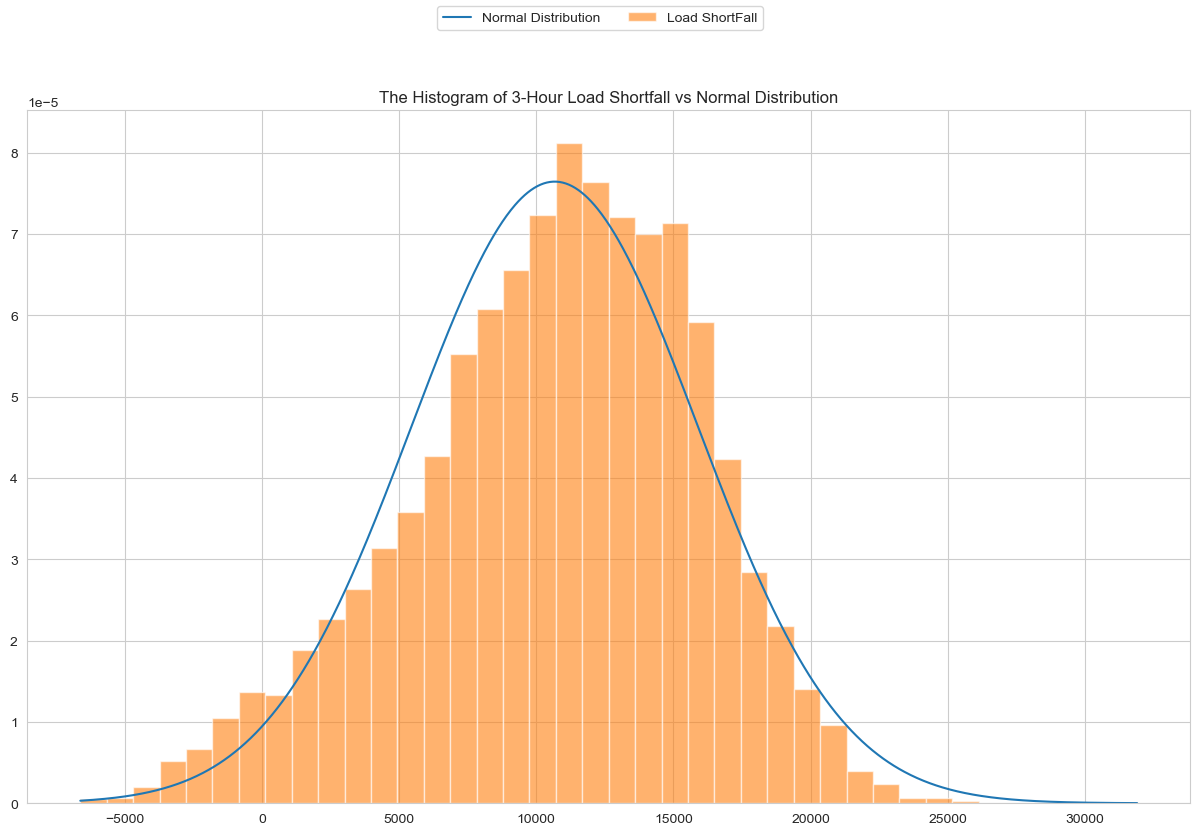

In [564]:
# Create a new figure object
fig, ax = plt.subplots(figsize=(15,9))

# Calculate important metrics from dataframe
mean_val =  df_train['load_shortfall_3h'].mean()
std_dev = df_train['load_shortfall_3h'].std()
min_val, max_val = df_train['load_shortfall_3h'].min(), df_train['load_shortfall_3h'].max()

# Plot the theoretical normal distribution of target variable
x = np.linspace(min_val, max_val, 1000)
ax.plot(x, norm.pdf(x, mean_val, std_dev), label = "Normal Distribution")

# Plot the normalized histogram of target variable
ax.hist(df_train['load_shortfall_3h'].values,
        alpha=0.6,
        label='Load ShortFall',
        bins=40,
        density=True
       )

# Set title of figure
ax.set_title("The Histogram of 3-Hour Load Shortfall vs Normal Distribution")

# Create lines and labels for use in legend
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# Insert figure legend and show the final figure
fig.legend(lines, labels, loc='upper center', ncol=2)
plt.show()

We see that our target variable is slightly skewed to the right from an ideal normal distribution. This can also be shown when we investigate the skew and kurtosis of our data explicitly, as done below

In [565]:
# Print the skew and kurtosis of our target variable
print(f"The Skew is {stats.skew(df_train['load_shortfall_3h'].values)}")
print(f"The Kurtosis is {stats.kurtosis(df_train['load_shortfall_3h'].values)}")

The Skew is -0.3847811918590848
The Kurtosis is -0.1196155018215368


Since we have a negative skewness, we can determine that our tail is slightly more pronounced on the left, rather than on the right. This indicates that more values are found on the right side of the mean as opposed to the left, indicating a skew to the right. Since the skew value is relatively small, it indicates that our target variable is fairly symmetrically distributed. Similarly, our kurtosis on this variable is very low, indicating a lack of outliers for our `load_shortfall_3h` variable

Next, let's look at some descriptive statistics for the rest of our variables:

In [566]:
# Get descriptive statistics of all potential predictor variables
statistics_df = df_train.drop('load_shortfall_3h', axis=1).describe().T
statistics_df

count         mean           std         min          25%          50%          75%           max
madrid_wind_speed     8763.0     2.425729      1.850371    0.000000     1.000000     2.000000     3.333333  1.300000e+01
bilbao_rain_1h        8763.0     0.135753      0.374901    0.000000     0.000000     0.000000     0.100000  3.000000e+00
valencia_wind_speed   8763.0     2.586272      2.411190    0.000000     1.000000     1.666667     3.666667  5.200000e+01
seville_humidity      8763.0    62.658793     22.621226    8.333333    44.333333    65.666667    82.000000  1.000000e+02
madrid_humidity       8763.0    57.414717     24.335396    6.333333    36.333333    58.000000    78.666667  1.000000e+02
bilbao_clouds_all     8763.0    43.469132     32.551044    0.000000    10.000000    45.000000    75.000000  1.000000e+02
bilbao_wind_speed     8763.0     1.850356      1.695888    0.000000     0.666667     1.000000     2.666667  1.266667e+01
seville_clouds_all    8763.0    13.714748     24.272482    0.000000     0.000000     0.000000    20.000000  9.733333e+01
bilbao_wind_deg       8763.0   158.957511    102.056299    0.000000    73.333333   147.000000   234.000000  3.593333e+02
barcelona_wind_speed  8763.0     2.870497      1.792197    0.000000     1.666667     2.666667     4.000000  1.266667e+01
barcelona_wind_deg    8763.0   190.544848     89.077337    0.000000   118.166667   200.000000   260.000000  3.600000e+02
madrid_clouds_all     8763.0    19.473392     28.053660    0.000000     0.000000     0.000000    33.333333  1.000000e+02
seville_wind_speed    8763.0     2.425045      1.672895    0.000000     1.000000     2.000000     3.333333  1.166667e+01
barcelona_rain_1h     8763.0     0.128906      0.634730    0.000000     0.000000     0.000000     0.000000  1.200000e+01
seville_rain_1h       8763.0     0.039439      0.175857    0.000000     0.000000     0.000000     0.000000  3.000000e+00
bilbao_snow_3h        8763.0     0.031912      0.557264    0.000000     0.000000     0.000000     0.000000  2.130000e+01
barcelona_pressure    8763.0  1377.964605  14073.140990  670.666667  1014.000000  1018.000000  1022.000000  1.001411e+06
seville_rain_3h       8763.0     0.000243      0.003660    0.000000     0.000000     0.000000     0.000000  9.333333e-02
madrid_rain_1h        8763.0     0.037818      0.152639    0.000000     0.000000     0.000000     0.000000  3.000000e+00
barcelona_rain_3h     8763.0     0.000439      0.003994    0.000000     0.000000     0.000000     0.000000  9.300000e-02
valencia_snow_3h      8763.0     0.000205      0.011866    0.000000     0.000000     0.000000     0.000000  7.916667e-01
madrid_weather_id     8763.0   773.527594     77.313315  211.000000   800.000000   800.000000   800.666667  8.040000e+02
barcelona_weather_id  8763.0   765.979687     88.142235  200.666667   800.000000   800.333333   801.000000  8.040000e+02
bilbao_pressure       8763.0  1017.739549     10.046124  971.333333  1013.000000  1019.000000  1024.000000  1.042000e+03
seville_weather_id    8763.0   774.658818     71.940009  200.000000   800.000000   800.000000   800.000000  8.040000e+02
valencia_pressure     6695.0  1012.051407      9.506214  972.666667  1010.333333  1015.000000  1018.000000  1.021667e+03
seville_temp_max      8763.0   297.479527      8.875812  272.063000   291.312750   297.101667   304.150000  3.204833e+02
madrid_pressure       8763.0  1010.316920     22.198555  927.666667  1012.333333  1017.333333  1022.000000  1.038000e+03
valencia_temp_max     8763.0   291.337233      7.565692  269.888000   285.550167   291.037000   297.248333  3.142633e+02
valencia_temp         8763.0   290.592152      7.162274  269.888000   285.150000   290.176667   296.056667  3.104267e+02
bilbao_weather_id     8763.0   724.722362    115.846537  207.333333   700.333333   800.000000   801.666667  8.040000e+02
seville_temp          8763.0   293.978903      7.920986  272.063000   288.282917   293.323333   299.620333  3.149767e+02
valencia_humidity     8763.0  

While the table above might provide some interesting facts about our data, it is cumbersome to view and interpret in its current format. For now, let us identify which of our variables is heavily skewed, moderately skewed or relatively symmetrical:

In [567]:
# Create dataframe containing skewness of all potential predictor variables:
skew_df = df_train.drop('load_shortfall_3h', axis=1).skew().to_frame()

# Display variables with high skewness
Highly_Pos_Skew = skew_df[(skew_df[0] >= 1)]
Highly_Neg_Skew = skew_df[(skew_df[0] <= -1)]
print("High positive skew:", Highly_Pos_Skew, "\n \n")
print("High negative skew:", Highly_Neg_Skew, "\n \n")

# Display variables with moderate skewness:
Mod_Pos_Skew = skew_df[(skew_df[0] > 0.5) & (skew_df[0] < 1) ]
Mod_Neg_Skew = skew_df[(skew_df[0] < -0.5) & (skew_df[0] > -1)]
print("Moderate positive skew:", Mod_Pos_Skew, "\n \n")
print("Moderate negative skew:", Mod_Neg_Skew, "\n \n")

# Display relatively symmetrical values:
Sym_skew = skew_df[(skew_df[0] <= 0.5) & (skew_df[0] >= -0.5) ]
print("Relatively Symmetrical:", Sym_skew, "\n \n")

High positive skew:                               0
madrid_wind_speed      1.441144
bilbao_rain_1h         5.222802
valencia_wind_speed    3.499637
bilbao_wind_speed      1.716914
seville_clouds_all     1.814452
barcelona_wind_speed   1.057331
madrid_clouds_all      1.246745
seville_wind_speed     1.151006
barcelona_rain_1h      8.726988
seville_rain_1h        8.067341
bilbao_snow_3h        26.177568
barcelona_pressure    57.979664
seville_rain_3h       19.342574
madrid_rain_1h         7.074308
barcelona_rain_3h     12.696605
valencia_snow_3h      63.298084 
 

High negative skew:                              0
madrid_weather_id    -3.107722
barcelona_weather_id -2.584011
seville_weather_id   -3.275574
valencia_pressure    -1.705162
madrid_pressure      -1.850768
bilbao_weather_id    -1.234844 
 

Moderate positive skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Moderate negative skew:                         0
bilbao_pressure -0.999642 
 

Relatively Symmetrical:                     

C:\Users\kobus\AppData\Local\Temp\ipykernel_96900\416661886.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skew_df = df_train.drop('load_shortfall_3h', axis=1).skew().to_frame()


We can see that a large portion of our data is relatively symmetrical, however there is a lot of variables that shows a high amount of skew. Interestingly, our dataset contains almost no variables exhibiting only moderate skewness. We note that all `_weather_id` variables have a high negative skew. Furthermore, it seems that all of the rain and snow data collected shows a high positive skew. 

Let's repeat the same process for calculating the Kurtosis:

In [568]:
# Create dataframe containing Kurtosis of all potential predictor variables:
kurt_df = df_train.drop('load_shortfall_3h', axis=1).kurtosis().to_frame()

# Display variables with high Kurtosis:
high_kurt= kurt_df[(kurt_df[0] >= 3)]
print("High kurtosis (Large amount of outliers):", high_kurt, "\n \n")

# Display variables with low Kurtosis:
low_kurt= kurt_df[(kurt_df[0] < 3)]
print("Low kurtosis (Small amount of outliers):", low_kurt, "\n \n")


High kurtosis (Large amount of outliers):                                 0
bilbao_rain_1h          32.904656
valencia_wind_speed     35.645426
bilbao_wind_speed        3.631565
barcelona_rain_1h      101.578931
seville_rain_1h         93.840746
bilbao_snow_3h         806.128471
barcelona_pressure    3687.564230
seville_rain_3h        413.136592
madrid_rain_1h          76.584491
barcelona_rain_3h      187.800460
valencia_snow_3h      4089.323165
madrid_weather_id        9.259047
barcelona_weather_id     5.701882
seville_weather_id      10.710308 
 

Low kurtosis (Small amount of outliers):                              0
madrid_wind_speed     2.036462
seville_humidity     -1.017983
madrid_humidity      -1.167537
bilbao_clouds_all    -1.533417
seville_clouds_all    2.155921
bilbao_wind_deg      -1.083530
barcelona_wind_speed  1.493635
barcelona_wind_deg   -0.959160
madrid_clouds_all     0.142079
seville_wind_speed    1.398580
bilbao_pressure       1.825323
valencia_pressure     2.211823


C:\Users\kobus\AppData\Local\Temp\ipykernel_96900\2049301580.py:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurt_df = df_train.drop('load_shortfall_3h', axis=1).kurtosis().to_frame()


Most of our data contains a relatively low amount of outliers. Interistingly, all of the rain and snow data, as well as most of the `_weather_id` variables contains a high amount of outliers. 

We can go one step further, and visualize all our numeric predictor variables. Obtaining histograms for each individual variable might provide key insights into the underlying structure of our data, and will corroborate the metrics calculated above:

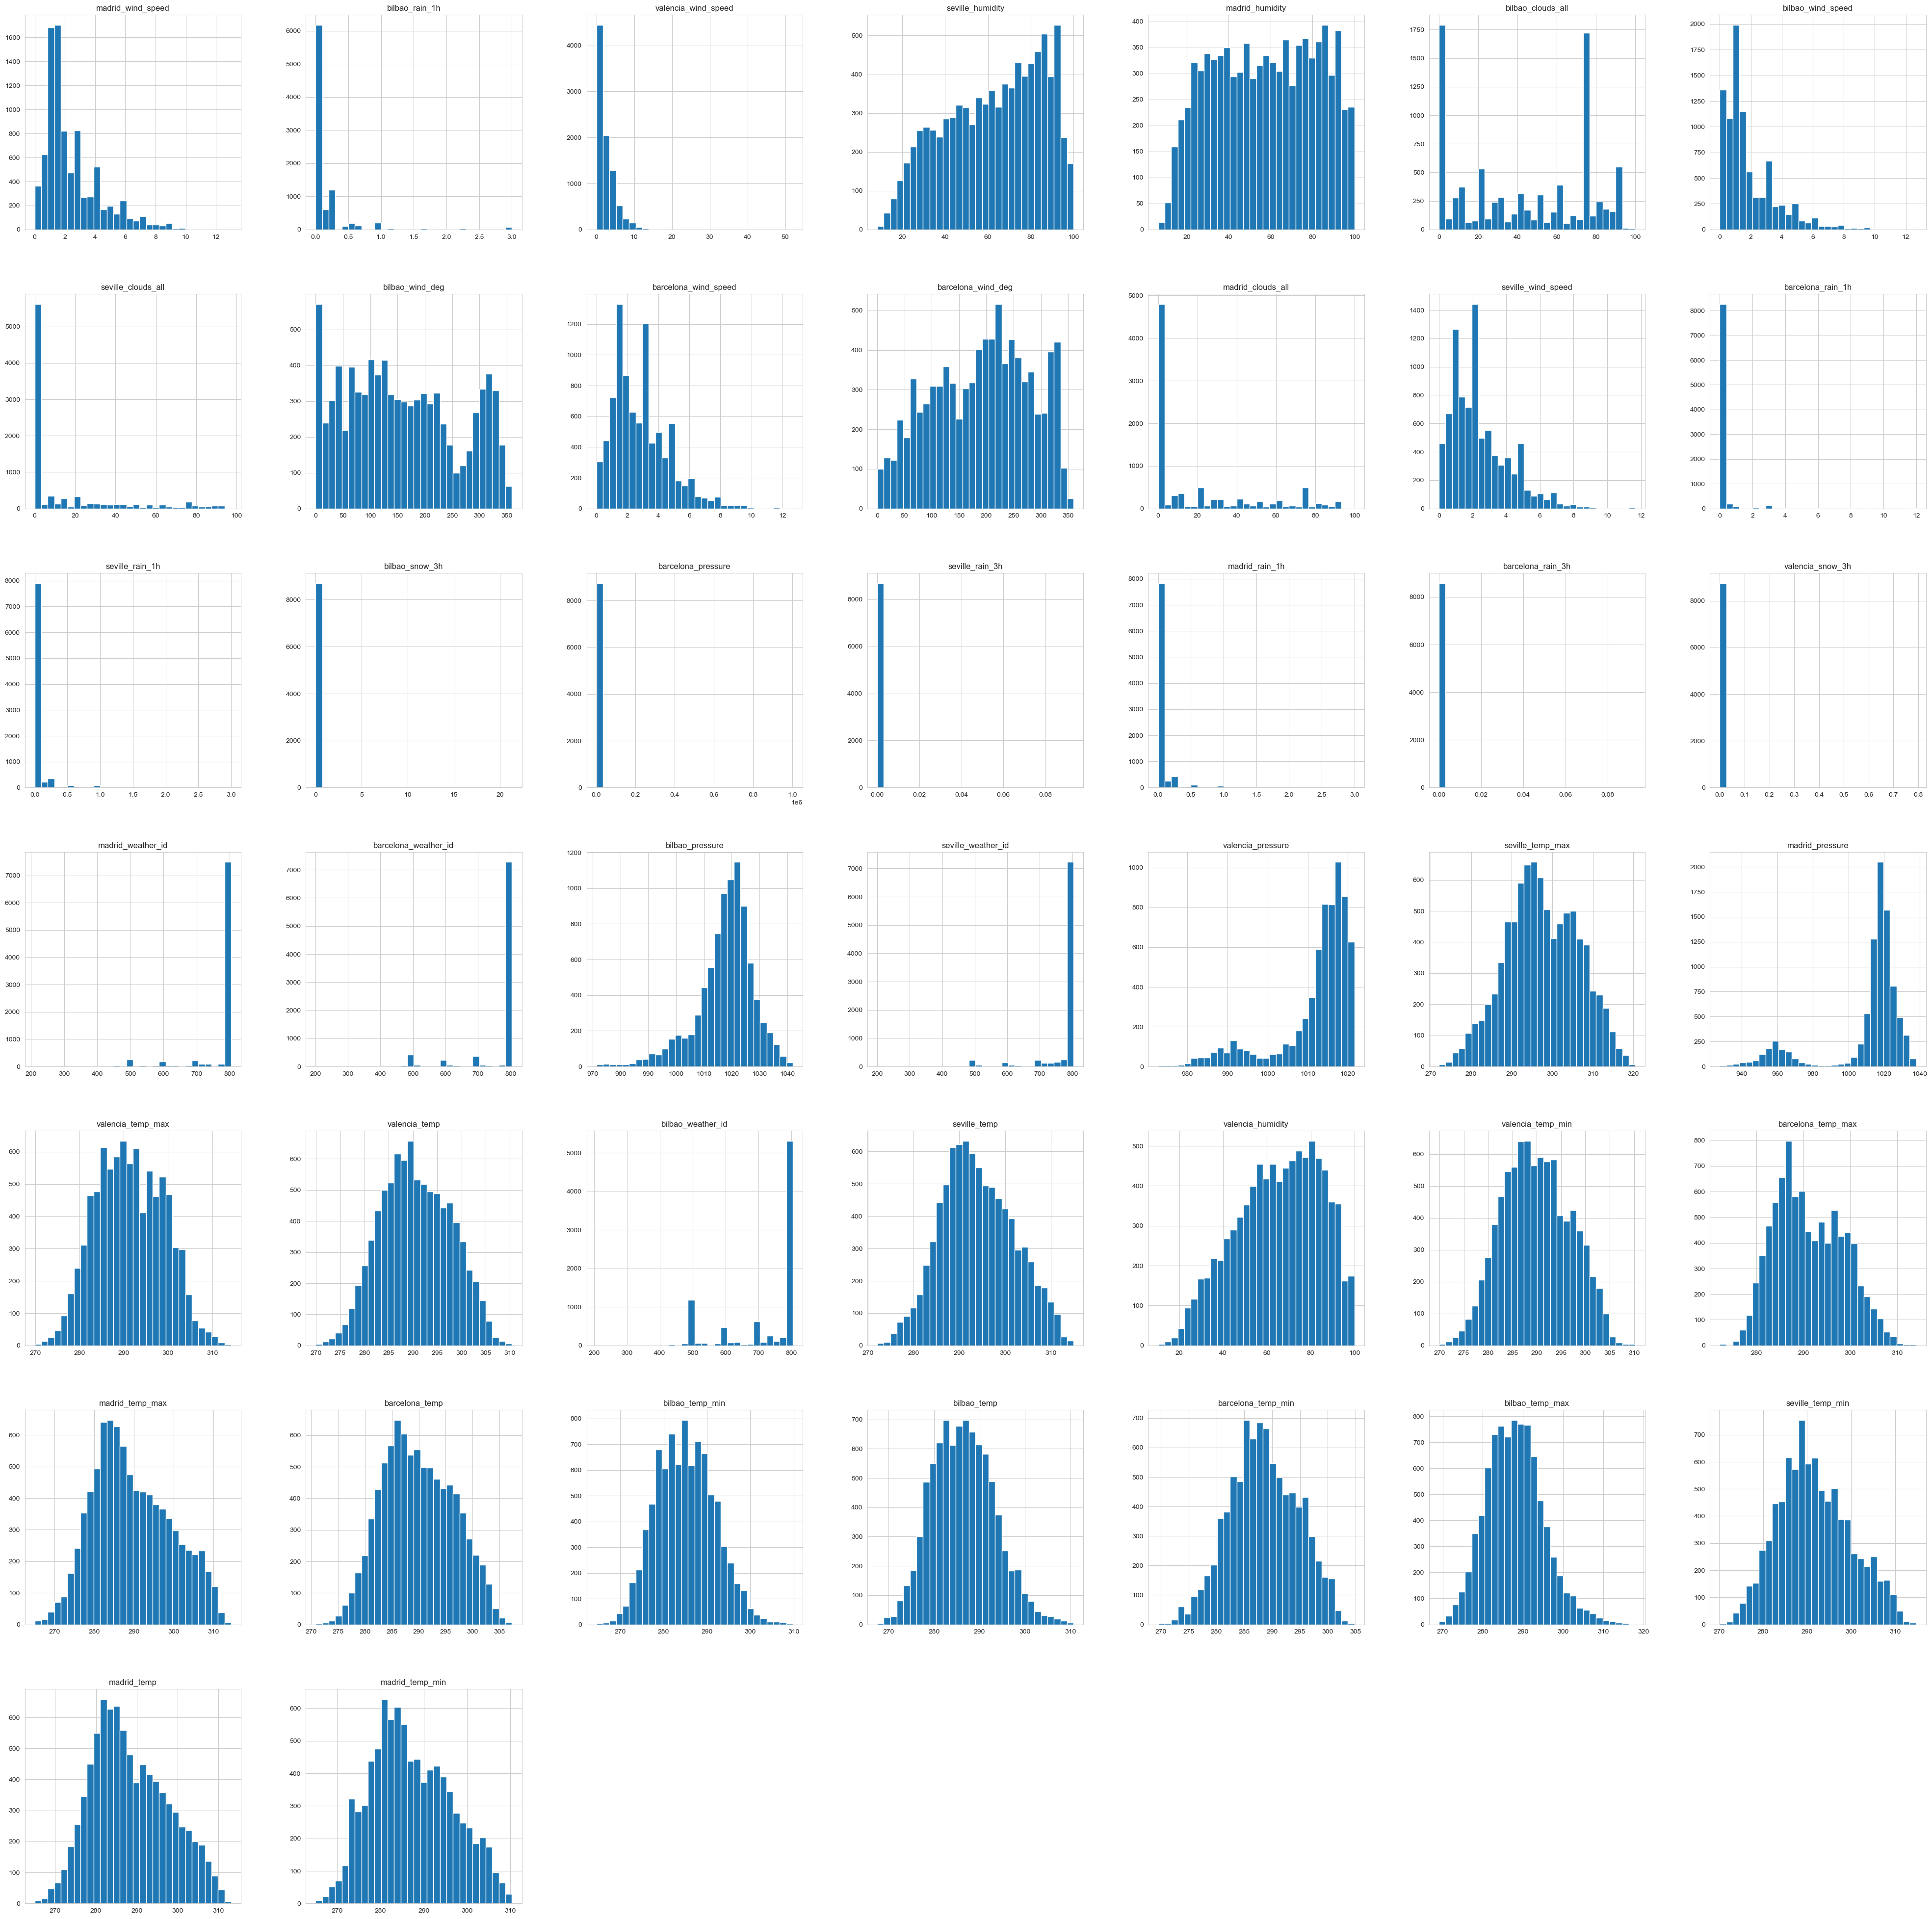

In [569]:
# Remove target variable form features to plot
features = num_vars[:-1] 

# Plots histograms for all features
df_train[features].hist(figsize=(50,50), bins=30)
plt.show()

The visualization above helps to easily identify variables that might prove troublesome when trying to build a coherent model of the data. For instance, it is clear that most of the cities experience close to no rain or snow throughout the data-collection period. Furthermore, the `_weather_id` variables for each city shows very little variation, making the impact that these might have on our target variable questionable, and we should consider if keeping them within the model would have any positive impact on our predictions, especially for models which doesn't automatically scale variables according to their influence. Lastly, we find a surprising result in the `barcelona pressure` variable, which shows almost no change in the data-collection period. This might be due to a large number of reasons, including erroneous collection of the data. Regardless, this feature shows almost no variation and should be noted down for further consideration

Selecting varaibles manually to include and exclude in the model building process can be quite challenging. 
One way of choosing which variables to manually include in the model, is to remove features whose values don't change much between observations, since they don't contribute much information to the model. We therefore select a variance threshold, and remove all features below this threshold. 

Since variance is dependent on scale, we will first need to normalize the features:

In [570]:
# Split predictor variables from target variable
X_data = df_train[num_vars[:-1]]
y_data = df_train[num_vars[-1]]

# Normalizing the data (using MinMaxScaler in sklearn.preprocessing package):
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

We can then implement an instance of the VarianceThreshold class contained in sklearn.feature_selection to select the correct subset of our features based on our chosen threshold (0.03 in this case): 

In [571]:
# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.03)

Having applied this threshold to the data, we can view the calculated variance for each predictor variable:

In [572]:
# Get column variances
column_variances = selector.variances_

# Create dictionary of column variances
vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]

# Transform dictionary into a dataframe for better visualization
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

Variable_Name  Variance
5      bilbao_clouds_all  0.105945
8        bilbao_wind_deg  0.080656
11     madrid_clouds_all  0.078692
4        madrid_humidity  0.067493
7     seville_clouds_all  0.062181
10    barcelona_wind_deg  0.061218
3       seville_humidity  0.060892
32     valencia_humidity  0.046143
43       madrid_temp_min  0.041115
27       madrid_pressure  0.040475
35       madrid_temp_max  0.038809
30     bilbao_weather_id  0.037692
42           madrid_temp  0.037678
25     valencia_pressure  0.037632
31          seville_temp  0.034066
26      seville_temp_max  0.033598
41      seville_temp_min  0.033520
36        barcelona_temp  0.031985
29         valencia_temp  0.031211
34    barcelona_temp_max  0.030093
39    barcelona_temp_min  0.029827
33     valencia_temp_min  0.029252
28     valencia_temp_max  0.029065
38           bilbao_temp  0.024880
37       bilbao_temp_min  0.021878
22  barcelona_weather_id  0.021340
40       bilbao_temp_max  0.021109
12    seville_wind_speed  0.020559
0      madrid_wind_speed  0.020257
23       bilbao_pressure  0.020208
9   barcelona_wind_speed  0.020017
6      bilbao_wind_speed  0.017923
21     madrid_weather_id  0.016996
1         bilbao_rain_1h  0.015615
24    seville_weather_id  0.014185
14       seville_rain_1h  0.003436
13     barcelona_rain_1h  0.002797
18        madrid_rain_1h  0.002588
2    valencia_wind_speed  0.002150
19     barcelona_rain_3h  0.001844
17       seville_rain_3h  0.001537
15        bilbao_snow_3h  0.000684
20      valencia_snow_3h  0.000225
16    barcelona_pressure  0.000198

The above table shows the variance for each predictor variable. We can then inspect all variables before applying our threshold to see if doing so might exclude important predictors form our model. If we choose to use the variance threshold method for variable selection, we can see that all the following variables would be discarded from our dataset based on showing little variability


In [573]:
# Find columns to remove:
df_vars_remove = df_vars[df_vars['Variance']<0.03]


# Make a list of column names to remove
columns_to_remove = list(df_vars_remove["Variable_Name"])

# Display variables to be removed, along with their variances
df_vars_remove.sort_values(by="Variance", ascending=False)

Variable_Name  Variance
39    barcelona_temp_min  0.029827
33     valencia_temp_min  0.029252
28     valencia_temp_max  0.029065
38           bilbao_temp  0.024880
37       bilbao_temp_min  0.021878
22  barcelona_weather_id  0.021340
40       bilbao_temp_max  0.021109
12    seville_wind_speed  0.020559
0      madrid_wind_speed  0.020257
23       bilbao_pressure  0.020208
9   barcelona_wind_speed  0.020017
6      bilbao_wind_speed  0.017923
21     madrid_weather_id  0.016996
1         bilbao_rain_1h  0.015615
24    seville_weather_id  0.014185
14       seville_rain_1h  0.003436
13     barcelona_rain_1h  0.002797
18        madrid_rain_1h  0.002588
2    valencia_wind_speed  0.002150
19     barcelona_rain_3h  0.001844
17       seville_rain_3h  0.001537
15        bilbao_snow_3h  0.000684
20      valencia_snow_3h  0.000225
16    barcelona_pressure  0.000198


Now, we can select our new columns to include in the model:

In [574]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# Comparing predictor variable count before and after applying variance threshold:
print("Before threshold: ", len(df_vars.T.columns), " predictors")
print("After threshold: ", len(X_new.columns), " predictors")

Before threshold:  44  predictors
After threshold:  20  predictors


Applying this standard of variable selection helped us eliminate more than half of all numeric predictor variables from our model, simplifying the model building process significantly

#### 4.3.2. Categorical Variables

Up to now, we have been inspecting all the variables that is numeric in nature. Let us now cast our focus to the categorical variables still present within the dataset. Let us consider which variables contains categorical data, and how many unique values they might take on:

In [575]:
# Number of unique values contained within the column
cat_unique = (
    df_train
    .select_dtypes(include='object')
    .nunique()
)

# Display categorical values, along with their unique value count
for i,j in zip(cat_unique.index, cat_unique.values):
    print(f"{i} has {j} unique values.")

valencia_wind_deg has 10 unique values.
seville_pressure has 25 unique values.


We see that we only have 2 categorical variables remaining within the dataset. Of the two, `valencia_wind_deg` takes on a fewer amount of values. Let us investigate further into how the data is distributed:

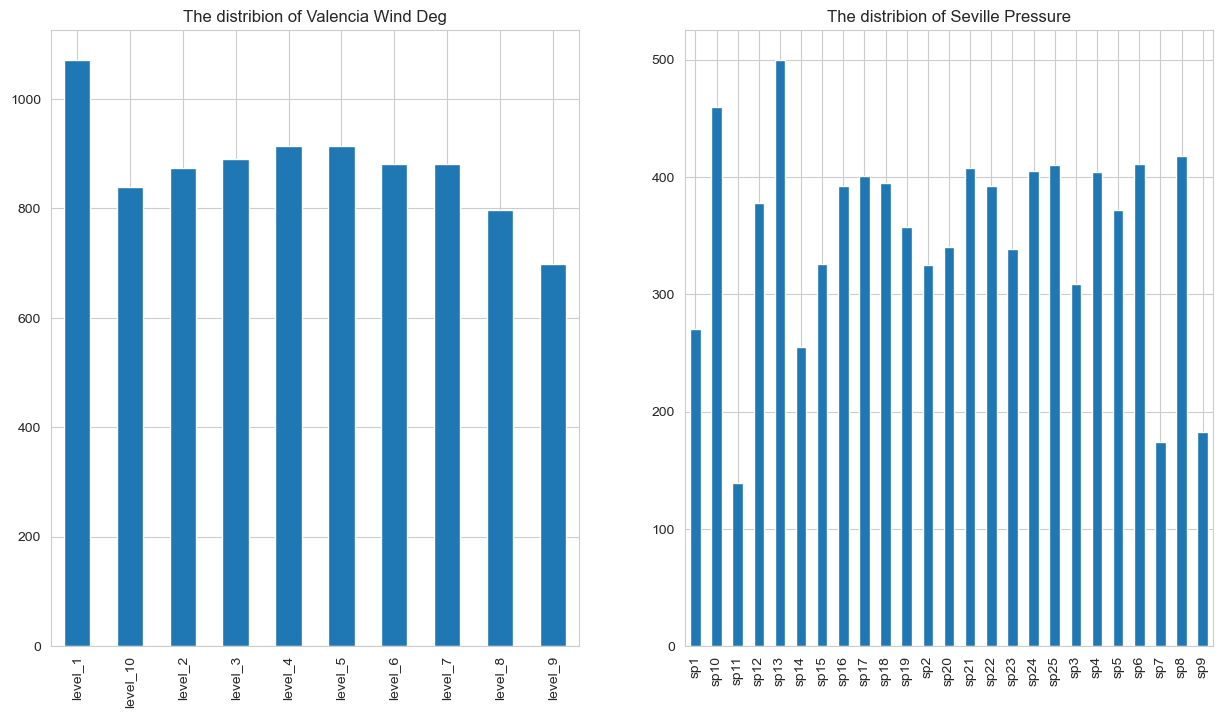

In [576]:
# Make a list of categorical variables
cat_cols = (
    df_train
    .select_dtypes(include='object')
    .columns
    .to_list()
)

# Initiate a figure object containing subplots equal to the amount of categorical variables
fig, axes = plt.subplots(1,len(cat_cols) ,figsize=(15,8))

# Initiate counter that keeps track of subplot position
i = 0

# Plot distributions for all categorical variables
for col in cat_cols:
    (
        df_train[col]
        .value_counts()
        .sort_index(ascending=True)
        .plot(kind='bar',
              ax=axes[i],
              title = f"The distribion of {re.sub(r'_',' ', col).title()}"
             )
    )
    i+=1
plt.show()

Form the visualization above, we gleam a few key insights. Both of our categorical variables contains inherently within them some corresponding numerical scale or value. This means that these categorical variables can be converted into numerical variables with relative ease. Furthermore, both features shows a high amount of variance, and will be beneficial to include in our model building process

### 4.4. Multivariate Analysis

Since we have considered each variable in a vacuum, we now turn our attention to how each variable correlates and influence the others. This multivariate analysis section is dedicated to that goal

#### 4.4.1. Numerical Multivariate Analysis

Let us first consider our numerical variables

Correlation coefficient is a measure of the how variables are related to one another. It is a standardized covariance, which measures how two random variables change with respect to each other. Since Covariance is scale dependent, we use the correlation coefficient (specifically Pearson Correlation) which standardizes the covariance to a scale between -1 and 1.

* A correlation coefficient closer 1 represents a strong linear relationship in the same direction, 
* A correlation coefficient closer to -1 represents a strong linear relationship in the opposite direction,
* A correlation closer to 0 represents a weak relationship.

The formula is given by:
$$\rho=\frac{Cov(X,Y)}{\sigma(X)\sigma(Y)}$$
Where
* $Cov(X,Y)$ represents the covariance between X and Y
* $\sigma(X)$ & $\sigma(Y)$ represent the standard deviations of X & Y respectively

In [577]:
# Investigate feature correlations 

df_train.corr(numeric_only = True)

madrid_wind_speed  bilbao_rain_1h  valencia_wind_speed  seville_humidity  madrid_humidity  bilbao_clouds_all  bilbao_wind_speed  seville_clouds_all  bilbao_wind_deg  barcelona_wind_speed  barcelona_wind_deg  madrid_clouds_all  seville_wind_speed  barcelona_rain_1h  seville_rain_1h  bilbao_snow_3h  barcelona_pressure  seville_rain_3h  madrid_rain_1h  barcelona_rain_3h  valencia_snow_3h  madrid_weather_id  barcelona_weather_id  bilbao_pressure  seville_weather_id  valencia_pressure  seville_temp_max  madrid_pressure  valencia_temp_max  valencia_temp  bilbao_weather_id  seville_temp  valencia_humidity  valencia_temp_min  barcelona_temp_max  madrid_temp_max  barcelona_temp  bilbao_temp_min  bilbao_temp  barcelona_temp_min  bilbao_temp_max  seville_temp_min  madrid_temp  madrid_temp_min  load_shortfall_3h
madrid_wind_speed              1.000000        0.259719             0.513092         -0.117892        -0.137092           0.244001           0.377854            0.191251         0.270950              0.294640           -0.095380           0.230126            0.434104           0.062758         0.108413        0.071183            0.011134         0.004795        0.150446          -0.014644          0.021660          -0.169358             -0.099582        -0.231747           -0.120014          -0.157088          0.050043        -0.136672           0.133468       0.128726          -0.238128      0.090861          -0.285787           0.119657            0.061854         0.091464        0.080133         0.077330     0.060467            0.089992         0.042114          0.110278     0.109572         0.098138          -0.150981
bilbao_rain_1h                 0.259719        1.000000             0.265864          0.069878         0.106765           0.370733           0.085398            0.081131         0.279350              0.069997           -0.030723           0.135524            0.140101           0.052558         0.092984        0.096730            0.052458         0.016392        0.187423          -0.001412          0.008269          -0.147768             -0.120618        -0.054814           -0.095723          -0.206765         -0.210323        -0.298587          -0.135198      -0.127953          -0.604616     -0.170009          -0.103868          -0.116835           -0.157326        -0.148397       -0.138901        -0.141269    -0.182494           -0.106593        -0.219871         -0.120575    -0.135927        -0.116431          -0.152510
valencia_wind_speed            0.513092        0.265864             1.000000         -0.075227        -0.019388           0.210524           0.386478            0.163675         0.248643              0.347966           -0.066071           0.221887            0.316035           0.031804         0.046085        0.115133            0.050282         0.027637        0.093865          -0.037553          0.058629          -0.099056             -0.037605        -0.096374           -0.069092          -0.041408         -0.024045        -0.158475           0.065815       0.072366          -0.201379     -0.008508          -0.413017           0.075533           -0.040998        -0.021970       -0.021456        -0.010166    -0.022676            0.001413        -0.033271          0.003618    -0.011982        -0.019742          -0.142791
seville_humidity              -0.117892        0.069878            -0.075227          1.000000         0.799831           0.061680          -0.088180            0.399436        -0.087246             -0.138625            0.164064           0.366602           -0.202449          -0.051022         0.227476        0.023556            0.021599         0.034343        0.164019           0.015555          0.007351          -0.228442             -0.050515        -0.099458           -0.328265          -0.088094         -0.566426        -0.103813          -0.650643      -0.663276          -0.105088     -0.743126           0.464012          -0.657427           -0.606770        -0.708937   

The table above shows the correlation coefficient of each variable in the dataset with respect to the others. 
Since we are looking at the correlation between 46 variables (which includes our dependent variable), it would be more beneficial to draw a heatmap of correlation to easily identify strong correlations between variables 

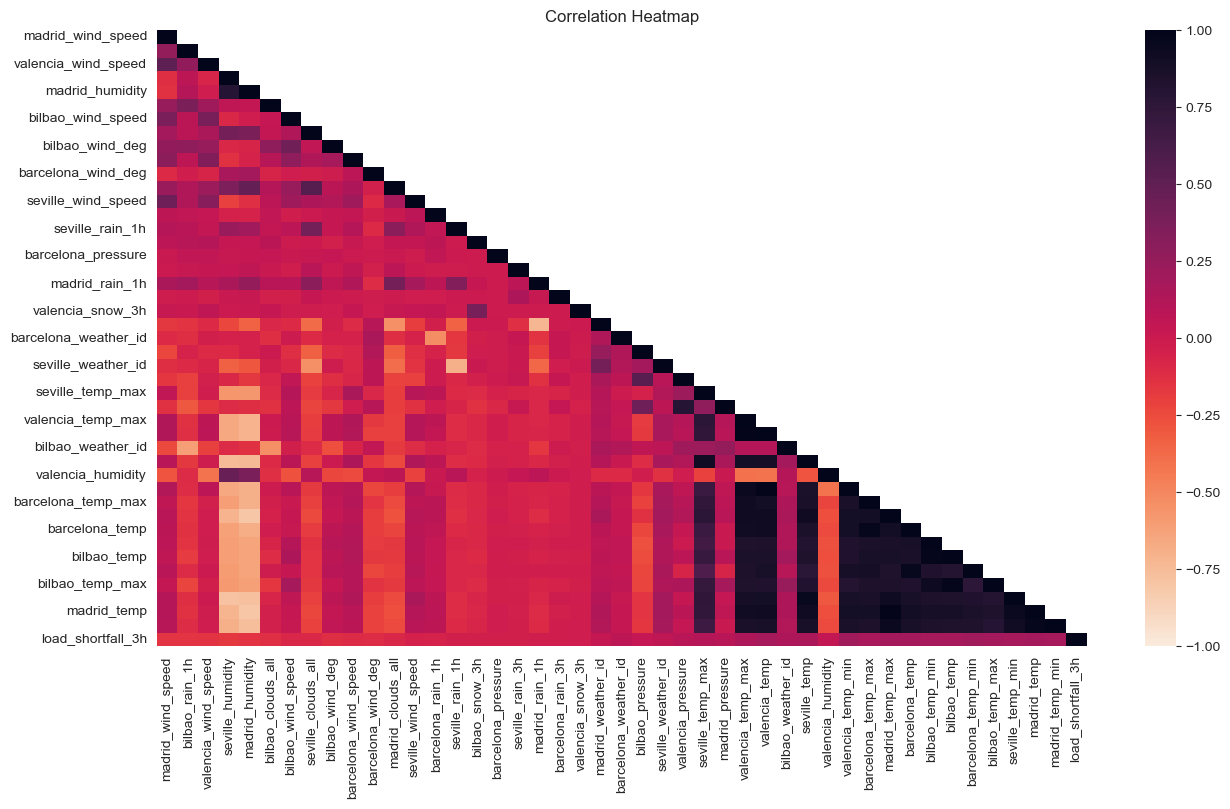

In [578]:
# Initiate a new figure object to plot our heatmap
plt.figure(figsize=(15,8))

# We look at only the lower triangle of the array, since it is symmetric around the diagonal
mask = np.tril(df_train.corr(numeric_only = True))==0



# Plotting the heatmap
sns.heatmap(df_train.corr(numeric_only = True),
            vmin=-1,
            vmax=1,
            mask=mask,
            cmap='rocket_r'
           )

plt.title('Correlation Heatmap');


From looking at the correlation heatmap, we see that there are a large amount of strong correlations, both positive and negative, between variables in the dataset. For example: `seville_humidity` and `seville_temp` are very strongly neagtivley correlated, while `valencia_temp` and `madrid_temp` are very strongly positively correlated. This means that our dataset contains a lot of superfluous and redundant information, which will negatively impact the predictive power of the model. We will either have to select variables to include in the model manually, or make use of a regression model that automatically scales the coefficients, like a **Ridge** or **LASSO** regression model.


If we choose to include and exclude predictor variables manually, we would need to establish some criteria to apply our filtering of the data. A common way of doing this is to examine the correlation between our predictor variables and our dependent variable `load_shortfall_3h`. Another common way is fitting a model using the correlated features and picking the one that contributes the most to the model.

Let's investigate the top 10 variables that are correlated with the target variable, ignoring the direction direction

In [579]:
# Find the ten most correlated variables with the target variable
corr_top10_df = (
    df_train.corr(numeric_only = True)['load_shortfall_3h']
    .apply(lambda x : abs(x))
    .sort_values(ascending=False)
    .head(11)
)

# Display predictor variables
corr_top10_df[1:11]

valencia_temp_min     0.201863
barcelona_temp_min    0.195984
madrid_temp           0.186036
barcelona_temp        0.182673
madrid_temp_max       0.182548
bilbao_temp_max       0.180934
bilbao_temp           0.176411
madrid_temp_min       0.174744
seville_temp_min      0.174718
valencia_temp         0.173225
Name: load_shortfall_3h, dtype: float64

From the above, we see that even our strongest correlated predictor variable is not very strongly correlated with our target variable. Let us investigate further by means of visualizing our variable correlations with all other variables

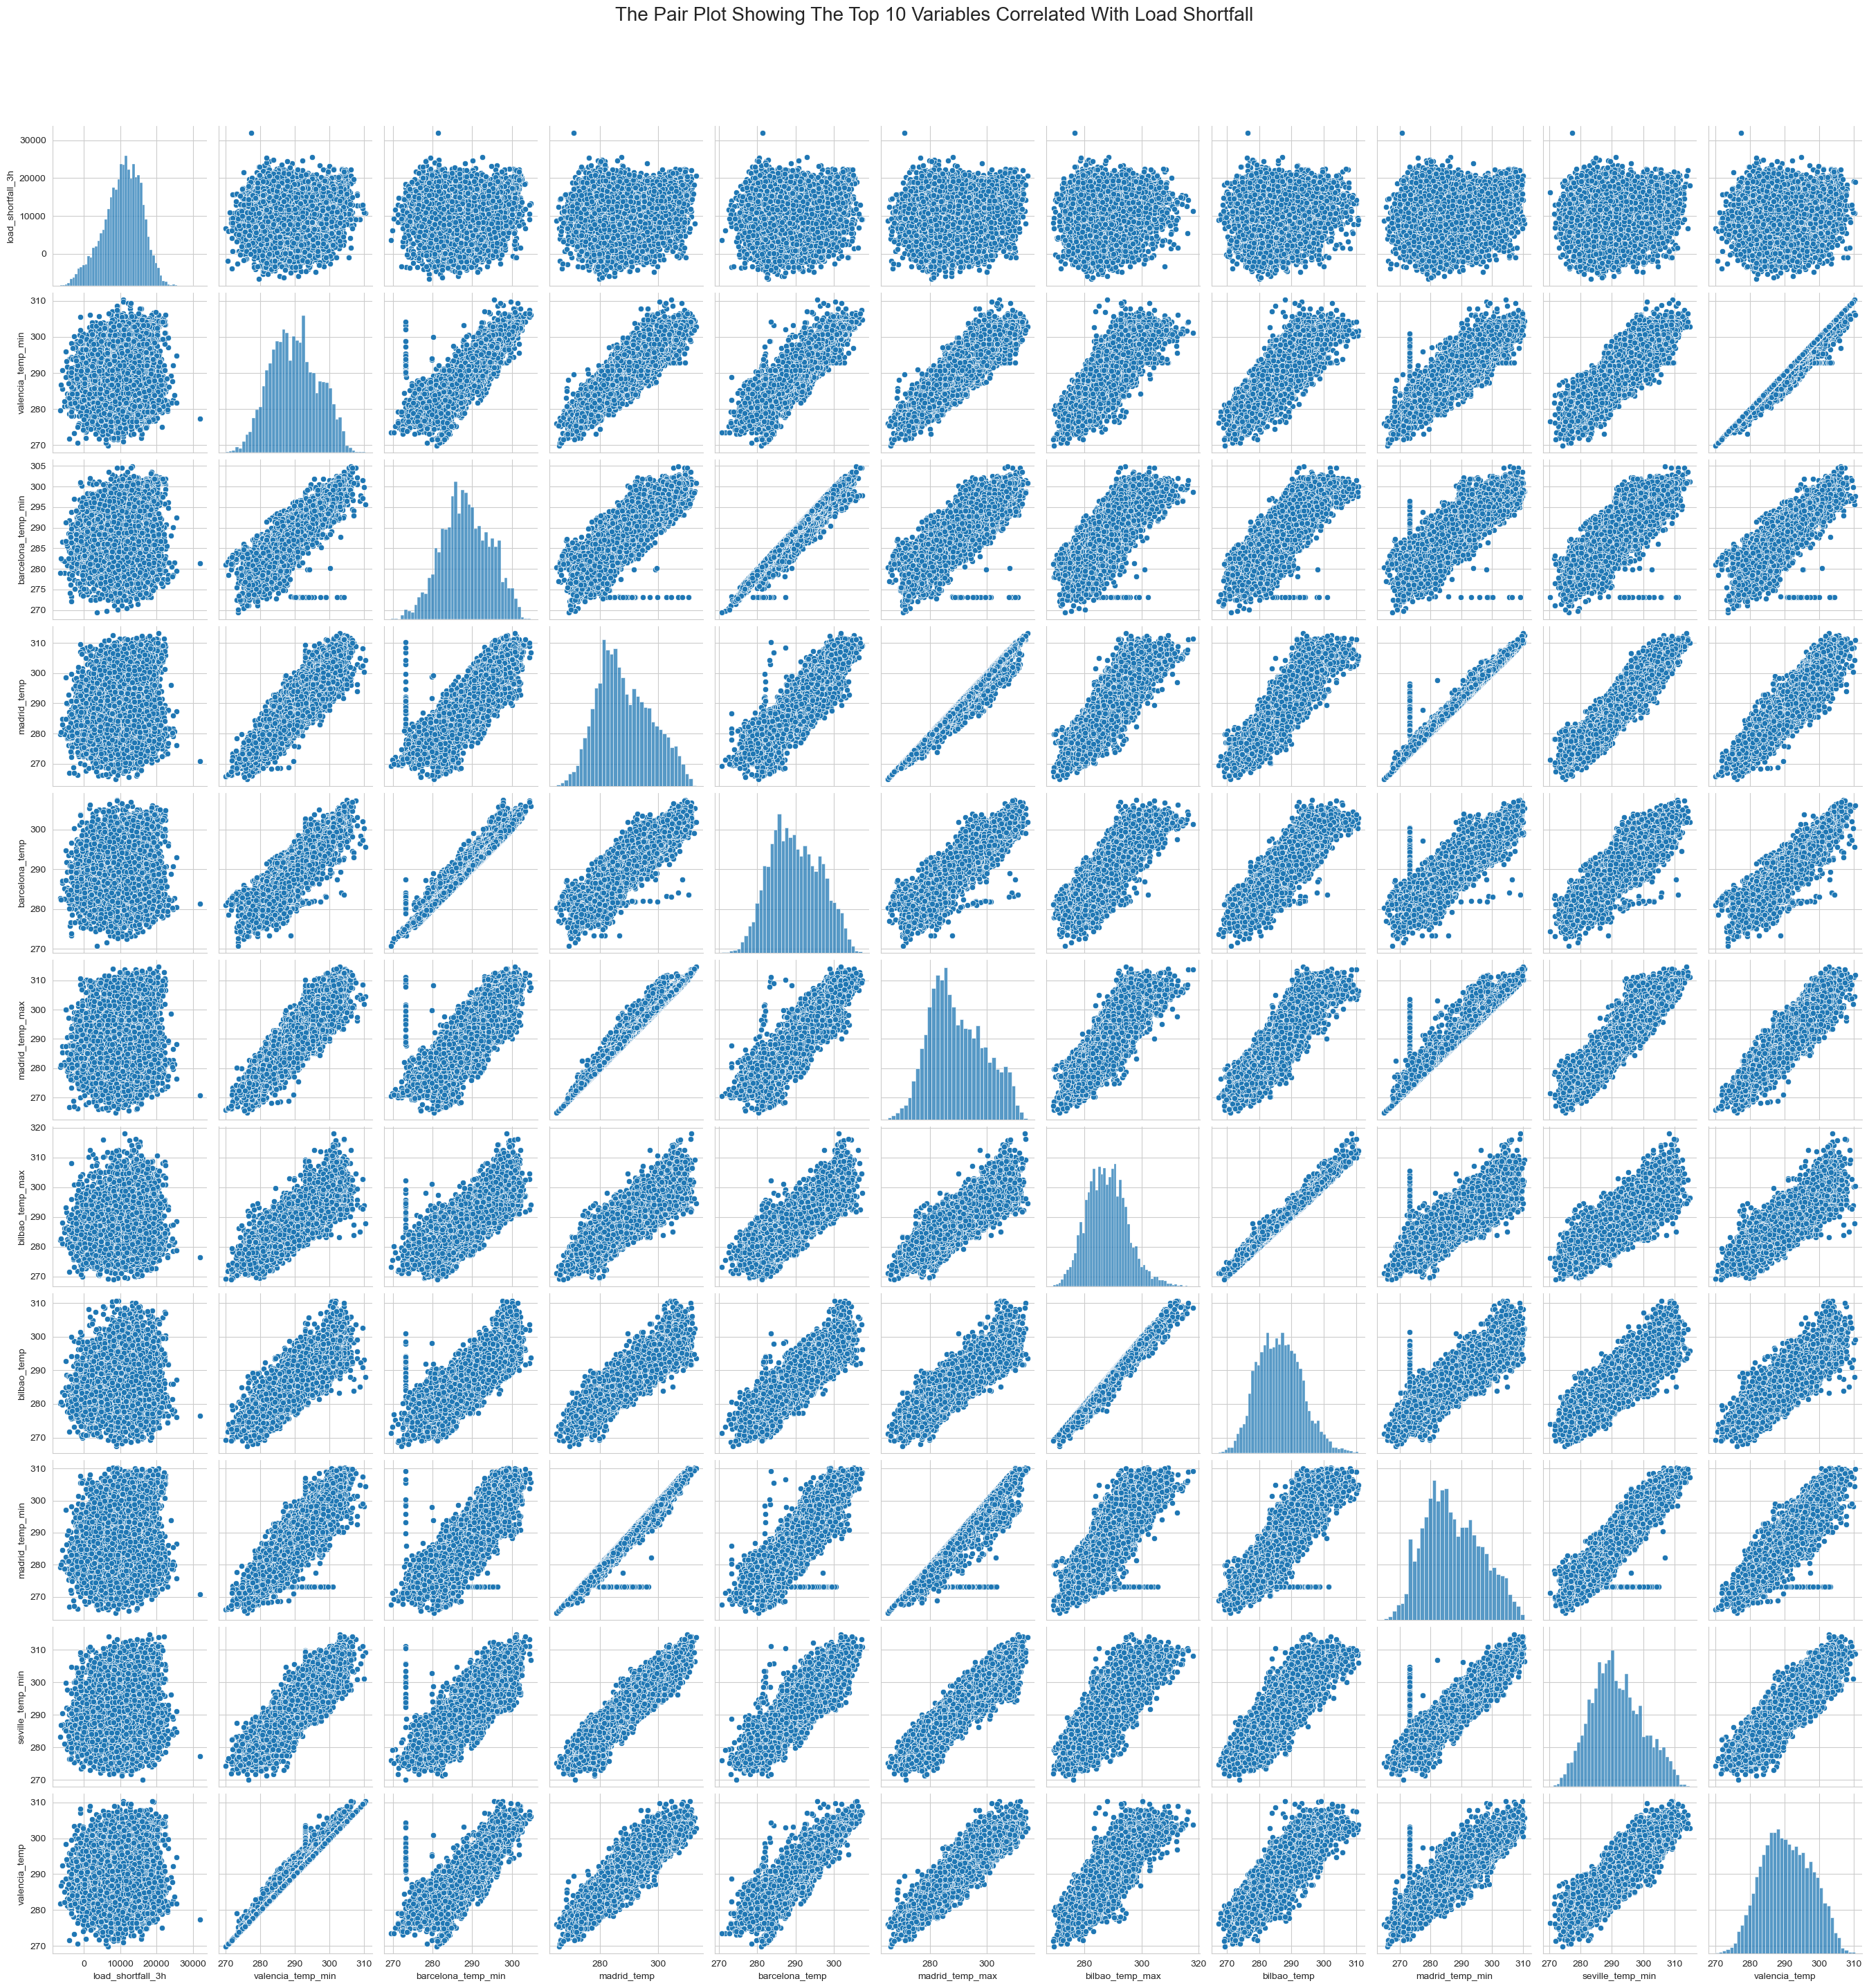

In [580]:
top10 = sns.pairplot(df_train[corr_top10_df.index]
                    )
top10.fig.suptitle('The Pair Plot Showing The Top 10 Variables Correlated With Load Shortfall', 
                   y=1.05,
                   size=20)
plt.show()

Again, we see from the above that none of the predictors are very highly correlated with the `load_shortfall_3h`. However, the predictors appear to be highly correlated with one another, examples being `valencia_temp_min` and `valencia_temp`. This indicates the presence of multicollinearity within the data, which will result in less reliable statistical inferences when it comes to building functional models since the effects of one variable on the target becomes difficult to distinguish from the effects of another

#### 4.4.2. Categorical Multivariate Analysis

Next let us consider our categorical data. First, let us break down the distribution of our target variable based on each individual value of our two categorical predictor variables:

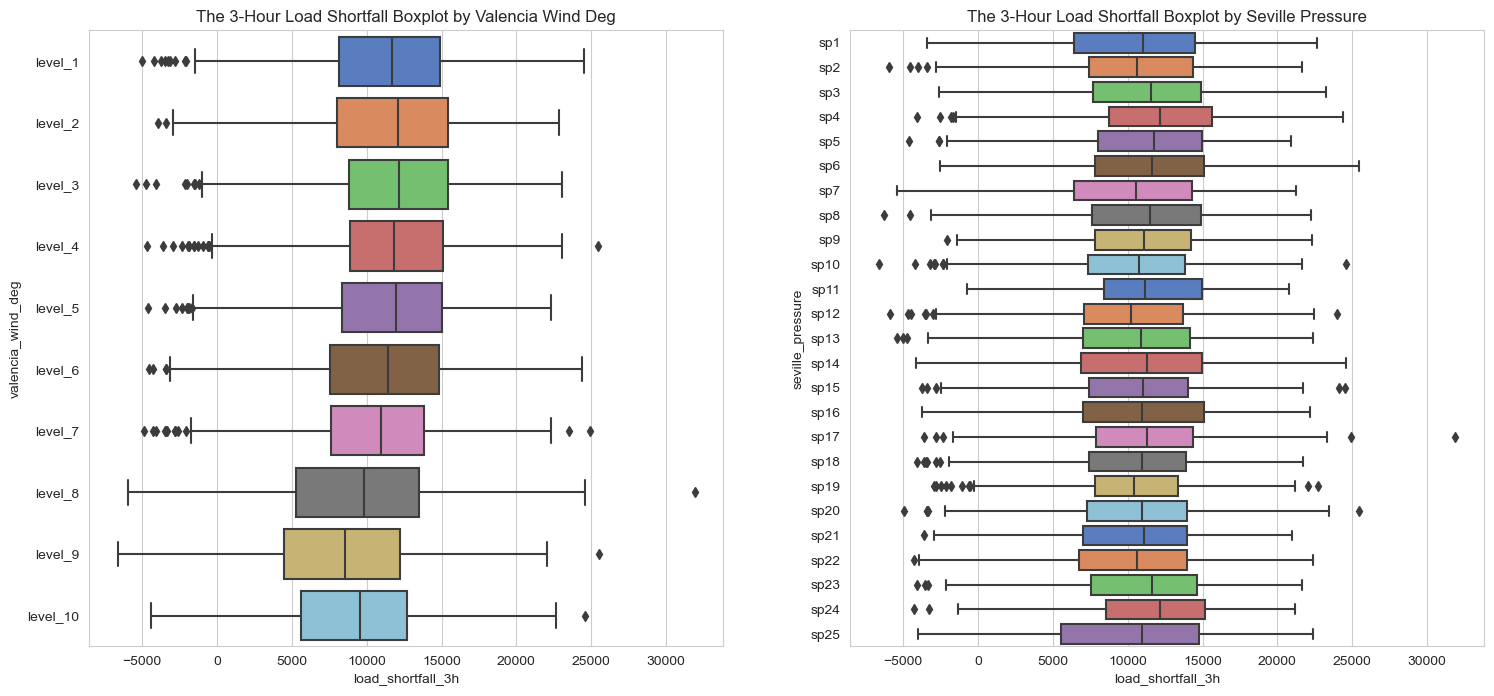

In [581]:
# Initialise a figure object
fig,axes = plt.subplots(1,
                        2,
                        figsize=(18,8)
                       )

# Create counter to keep track of subplot position
counter=0

# Plot a box plot of the target variable based on all instances of predictor variable values
for col in cat_cols:
    df_train[f"{col}_sort"] =  df_train[col].apply(lambda  x : int(re.search(r"\d+", x ).group())) # Sort columns in sequential order
    sns.boxplot(
        data=df_train.sort_values(by = f"{col}_sort"),
        x='load_shortfall_3h',
        y=col,
        palette='muted',
        ax = axes[counter]
    ).set_title(f"The 3-Hour Load Shortfall Boxplot by {re.sub('_', ' ',col).title()}")
    counter+=1
    df_train.drop(columns=[f"{col}_sort"],
            inplace=True
           )

plt.show()

We see that both categorical variables seems to have some influence on our target variable. Let us calculate a chi-squared test for these variables to determine their independence

In [582]:
# Chi-squared independent test for categorical variables

# Creating a contingency table
ct = pd.crosstab(df_train['valencia_wind_deg'], 
                 df_train['seville_pressure'],
                 margins=True
                )

# Discount the last row and column of the table, since they house combined results
obs = ct.iloc[:-1,:-1]

# Perform a chi square test of independence
res = chi2_contingency(obs)

# Print results
print(f"The test_statistics is {res[0]} and the p_value is {res[1]} at {res[2]} degrees of freedom")

The test_statistics is 1259.86678922933 and the p_value is 8.708288784985601e-147 at 216 degrees of freedom


Since the p-value is extremely small, it provides concrete evidence against the fact that the 2 variables are independent. 

#### 4.4.3. Time Effects on the 3-Hour Load Shortfall

Lastly, let us consider the effect of our datetime data on our target variable. First, let's plot the target variable as a function of the date and time, to see if there is any relationship between them:

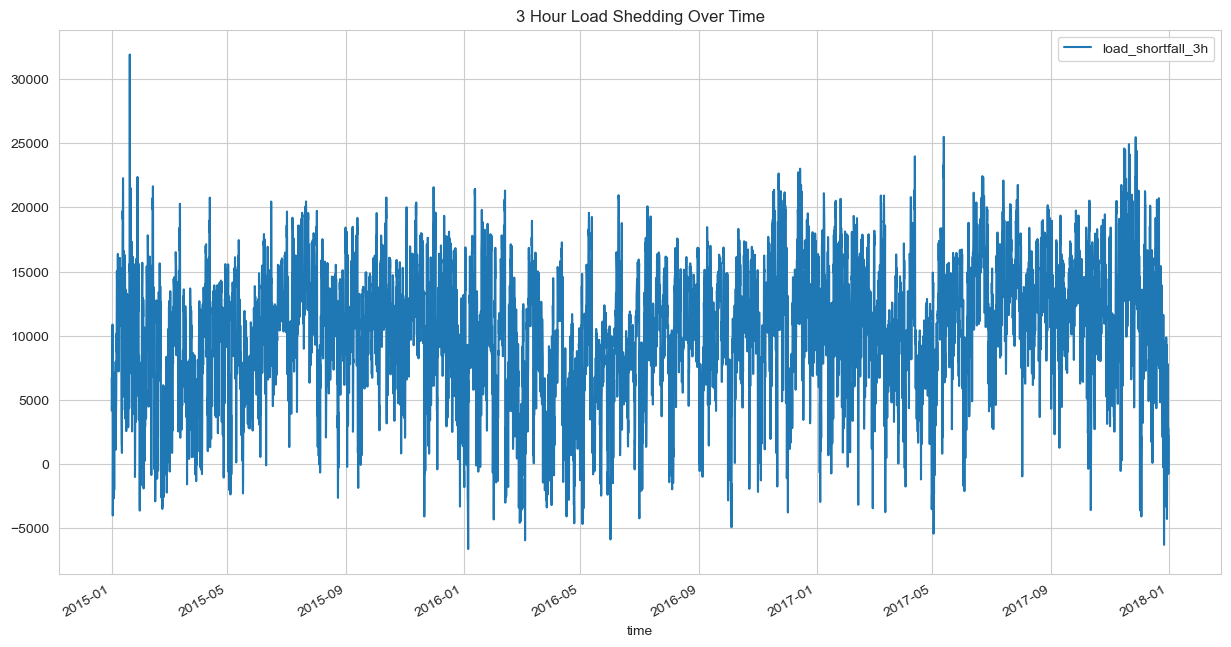

In [583]:
# Initialize a new figure object
fig1, ax1 = plt.subplots(figsize=(15,9))

# Plot the target variable as a function of time
(
    df_train[['time','load_shortfall_3h']]
    .set_index('time')
    .plot(figsize=(15,8),
          ax=ax1
         )
)

# Set the title of the graph, and display it to the screen
ax1.set_title('3 Hour Load Shedding Over Time')
plt.show()

The observations we can make from the figure above is extremely interesting. We can clearly see a clear cyclical relationship between the load shortfall, and the time of the year. This might point to the fact that the season may have a large influence on our target variable. We can investigate further, breaking down the datetime into relevant categories and exploring more potential influences on the target variable. Let us first consider the load shortfall per year:

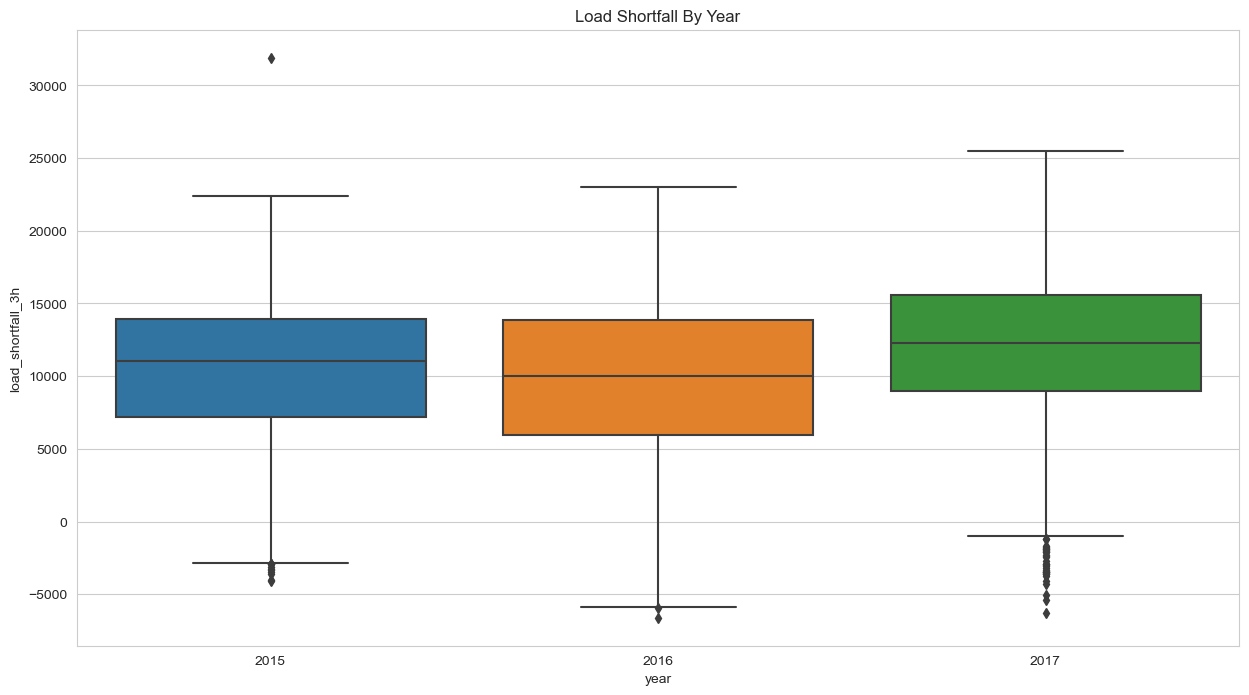

In [584]:
# Create a new column in the database containing the year which data was collected:
df_train['year'] = df_train['time'].dt.year

# Initiate a new figure object
fig, ax = plt.subplots(figsize=(15,8))

# Plot the distribution of load shortfall per year
sns.boxplot(data=df_train, x="year", y="load_shortfall_3h")

# Set figure title and display image
ax.set_title('Load Shortfall By Year')
plt.show()

We see that the average load shortfall decreased for the year 2016, and then dramatically improved for the year 2017 again. The reasons for this is still unclear, but form the data we can see that the year 2017 had a larger difference between the amount of energy generated from renewable sources, as opposed to non-renewable. Either the amount of renewable energy produced increased, or the production of non-renewable energy decreased.

Let us plot the load shortfall as a function of month of the year, to investigate further into the effects of season on the target variable:

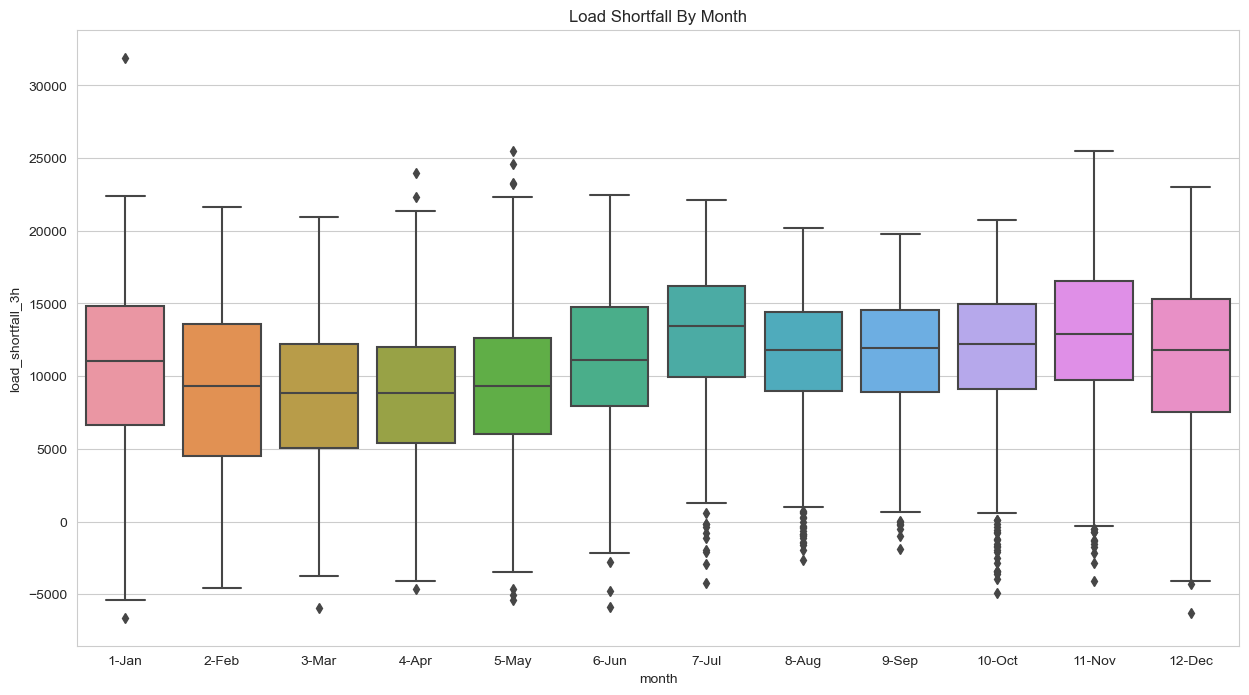

In [585]:
# Extract month of the year into new variable
df_train['month'] = df_train['time'].dt.month.apply(lambda x : f'{x}-{calendar.month_abbr[x]}')

# Initialize a figure object
fig, ax = plt.subplots(figsize=(15,8))

# Plot the target variable as a function of month of the year
sns.boxplot(data=df_train, x="month", y="load_shortfall_3h")

# Set title and display image
ax.set_title('Load Shortfall By Month')
plt.show()

Here we can more clearly see the effect that the month of the year  can have on the target variable. The target variable is lowest in the spring(March 1st to May 31st), indicating that springtime is less reliable for the production of renewable energy in the region. The load shortfall then increases as summer (June 1 to August 31st) approaches, reaching a peak right as summer does. Autumn (September 1 to November 30) sees a stable production of renewable energy, and the production then decreases again as winter (December 1st to February 28/29) falls. The reason for this is not evident by just observing the graph above. We could speculate that the sun is less efficient during winter as a source of solar energy, decreasing the efficiency of solar power which increases again in summer times as the sun becomes more effective. Rain and snowfall may also play a part on the production of renewable energy, and will vary as the seasons does.

Let us consider which hours of the day produces more renewable energy:

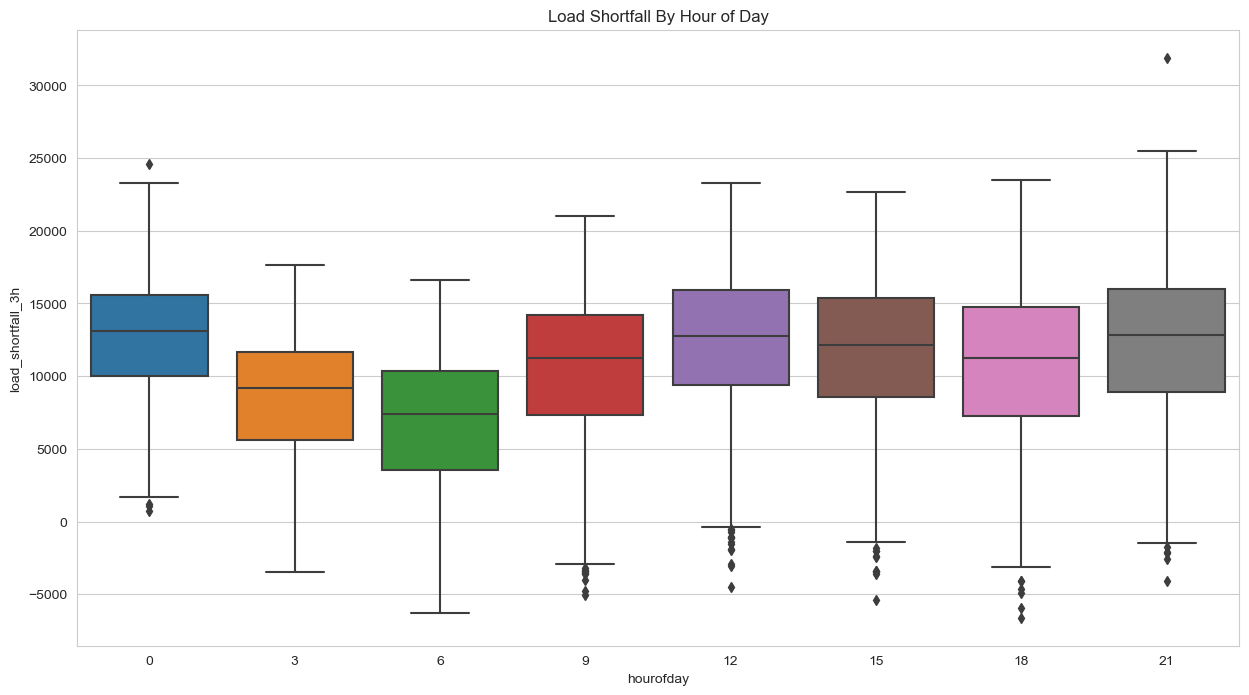

In [586]:
# Create a new variable containing the hour of the day
df_train['hourofday'] = df_train['time'].dt.hour 

# Initialize a new figure object
fig, ax = plt.subplots(figsize=(15,8))

# Plot target variable as a function of the hour of the day
sns.boxplot(data=df_train,
            x="hourofday",
            y="load_shortfall_3h"
           )

# Set title and display image
ax.set_title('Load Shortfall By Hour of Day')
plt.show()

We see that between midnight and 6 am, the renewable energy production gradually decreases. Afterwards, it picks up rapidly and stabilizes throughout the rest of the day. 

Finally, lets consider the impact that the day of the week has on the production of renewable energy:

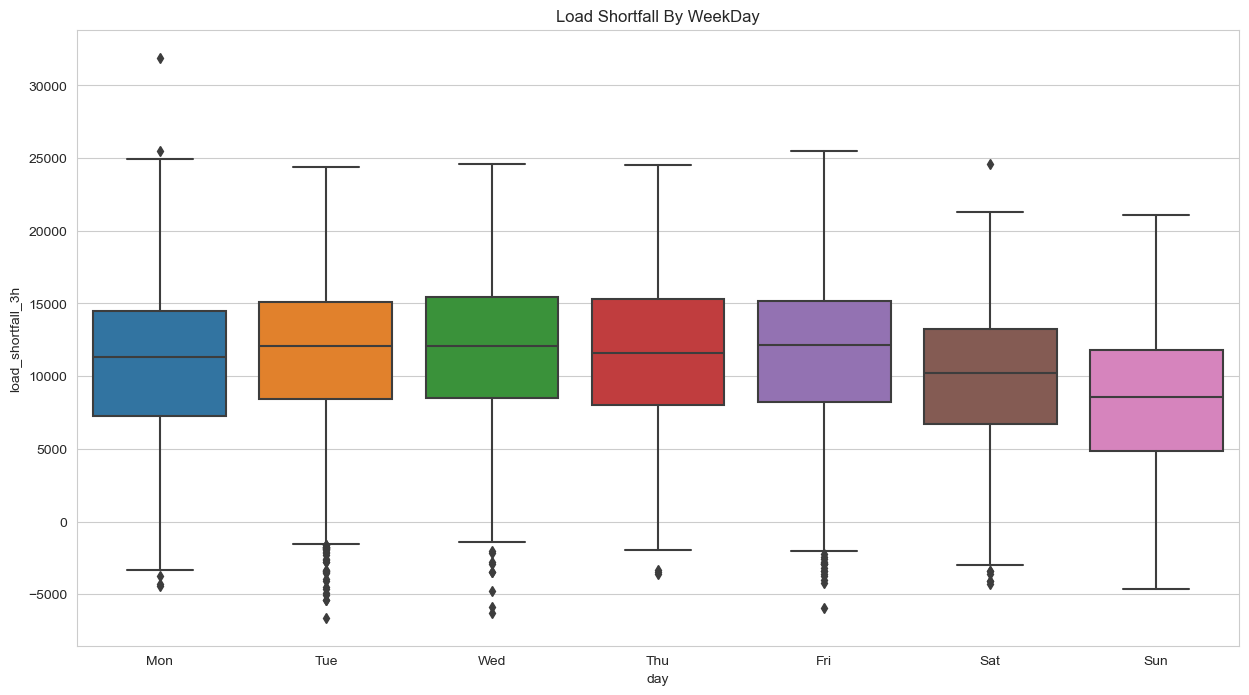

In [587]:
# Create a new variable containing the numeric day of the week
df_train['day'] = df_train['time'].dt.dayofweek

# Initialize a new figure object
fig, ax = plt.subplots(figsize=(15,8))

# Plot target variable as a function of weekday
sns.boxplot(data=df_train,
            x="day",
            y="load_shortfall_3h"
           )

# Set title, set x axis to corresponding day of the week and display image
ax.set_title('Load Shortfall By WeekDay')
ax.set_xticks([0,1,2,3,4,5,6], labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()

Finally, we see that the amount of renewable energy produced is stable throughout the week, but falls quite significantly on Saturdays and Sundays

<a id="five"></a>
## 5. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we will clean the dataset and create new features as identified in the EDA phase. |

---

For engineering the data, we will consider the original data as given, and discard the temporary changes made during the EDA section. This is due to the fact that the changes made to the datasets were specifically tailored to improve the EDA, where the changes we will make now will be specifically tailored to improve the model performance. 


In [588]:
# Read the original data into our dataframes
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv("df_test.csv")

### 5.1 General data engineering applicable to all models:

Since we will be altering the structure of our dataset, we will combine our testing and training datasets in order to avoid duplicating the operations performed on them: 

In [589]:
# Stack the training dataset on top of the testing dataset
df_combined = pd.concat((df_train, df_test))


Let's remind ourselves how the dataframe looks when we roll back the changes made during the EDA process

In [590]:
# DIsplay first 5 rows of combined dataframe 
df_combined.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h Seville_pressure  Seville_rain_1h  Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  Madrid_temp_min  load_shortfall_3h
0           0  2015-01-01 03:00:00           0.666667           level_5             0.0             0.666667         74.333333        64.000000                0.0           1.000000                 0.0       223.333333              6.333333           42.666667                0.0            3.333333                0.0             sp25              0.0             0.0         1036.333333              0.0             0.0                0.0               0.0              800.0                 800.0      1035.000000               800.0        1002.666667        274.254667       971.333333         269.888000     269.888000              800.0    274.254667          75.666667         269.888000          281.013000       265.938000      281.013000       269.338615   269.338615          281.013000       269.338615        274.254667   265.938000       265.938000        6715.666667
1           1  2015-01-01 06:00:00           0.333333          level_10             0.0             1.666667         78.333333        64.666667                0.0           1.000000                 0.0       221.000000              4.000000          139.000000                0.0            3.333333                0.0             sp25              0.0             0.0         1037.333333              0.0             0.0                0.0               0.0              800.0                 800.0      1035.666667               800.0        1004.333333        274.945000       972.666667         271.728333     271.728333              800.0    274.945000          71.000000         271.728333          280.561667       266.386667      280.561667       270.376000   270.376000          280.561667       270.376000        274.945000   266.386667       266.386667        4171.666667
2           2  2015-01-01 09:00:00           1.000000           level_9             0.0             1.000000         71.333333        64.333333                0.0           1.000000                 0.0       214.333333              2.000000          326.000000                0.0            2.666667                0.0             sp25              0.0             0.0         1038.000000              0.0             0.0                0.0               0.0              800.0                 800.0      1036.000000               800.0        1005.333333        278.792000       974.000000         278.008667     278.008667              800.0    278.792000          65.666667         278.008667          281.583667       272.708667      281.583667       275.027229   275.027229          281.583667       275.027229        278.792000   272.708667       272.708667        4274.666667
3           3  2015-01-01 12:00:00           1.000000           level_8             0.0             1.000000         65.333333        56.333333                0.0           1.000000                 0.0       199.666667              2.333333          273.000000                0.0            4.000000                0.0             sp25              0.0             0.0         1037.000000              0.0             0.0                0.0               0.0             

Note that from the way our datasets are stacked, the testing dataset is at the bottom of our new combined dataset. Since the testing dataset doesn't have values for our response variable `load_shortfall_3h`, we expect those values to be empty for the 2nd part of our dataset. We can demonstrate this by displaying the last few entries of our combined dataset:

In [591]:
# Display last values of combined dataframe
df_combined.tail()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h Seville_pressure  Seville_rain_1h  Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  Madrid_temp_min  load_shortfall_3h
2915       11678  2018-12-31 09:00:00           0.333333           level_9             0.0             2.000000         81.666667        49.666667          80.000000           1.333333                 0.0        70.000000              6.333333          320.000000                0.0            2.000000                0.0             sp24              0.0             0.0         1029.666667              0.0             0.0                0.0               0.0              800.0                 800.0      1034.666667               800.0                NaN        280.816667      1031.666667         279.816667     279.323333         734.333333    280.210000          69.666667         278.816667          279.816667       281.483333      278.140000       270.816667   273.210000          276.483333       276.150000        279.816667   274.910000       271.150000                NaN
2916       11679  2018-12-31 12:00:00           0.333333           level_8             0.0             1.333333         61.000000        28.333333          56.666667           1.000000                 0.0        36.666667              2.666667          293.333333                0.0            4.000000                0.0             sp24              0.0             0.0         1028.666667              0.0             0.0                0.0               0.0              800.0                 800.0      1034.333333               800.0                NaN        287.483333      1031.333333         290.816667     290.323333         747.666667    287.280000          32.000000         289.816667          286.483333       287.816667      286.150000       278.150000   278.443333          285.816667       278.816667        287.150000   283.156667       280.483333                NaN
2917       11680  2018-12-31 15:00:00           1.000000           level_6             0.0             3.000000         47.000000        26.333333           0.000000           0.666667                 0.0        14.666667              2.666667          233.333333                0.0            4.666667                0.0             sp23              0.0             0.0         1027.000000              0.0             0.0                0.0               0.0              800.0                 800.0      1033.000000               800.0                NaN        290.816667      1030.000000         293.483333     293.483333         800.000000    290.816667          23.666667         293.483333          289.483333       288.816667      288.820000       284.150000   285.073333          288.150000       285.816667        290.816667   287.733333       286.483333                NaN
2918       11681  2018-12-31 18:00:00           1.000000           level_6             0.0             2.000000         52.666667        56.666667           0.000000           0.666667                 0.0        19.000000              2.333333          253.333333                0.0            3.333333                0.0             sp23              0.0             0.0         1027.000000              0.0             0.0                0.0               0.0 


Let us consider all the information gathered during our exploratory data analysis. One of the first things we noted was that the dataset contained a redundant variable `Unnamed 0`. Since this variable does not contribute anything meaningful to the dataset and will not be used by any of the models we plan to train, we can remove it:

In [592]:
# Drop "Unnamed: 0" column from database
df_combined = df_combined.drop("Unnamed: 0", axis = "columns")
df_combined

time  Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h Seville_pressure  Seville_rain_1h  Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  Madrid_temp_min  load_shortfall_3h
0     2015-01-01 03:00:00           0.666667           level_5             0.0             0.666667         74.333333        64.000000           0.000000           1.000000                 0.0       223.333333              6.333333           42.666667                0.0            3.333333                0.0             sp25              0.0             0.0         1036.333333              0.0             0.0                0.0               0.0              800.0                 800.0      1035.000000               800.0        1002.666667        274.254667       971.333333         269.888000     269.888000         800.000000    274.254667          75.666667         269.888000          281.013000       265.938000      281.013000       269.338615   269.338615          281.013000       269.338615        274.254667   265.938000       265.938000        6715.666667
1     2015-01-01 06:00:00           0.333333          level_10             0.0             1.666667         78.333333        64.666667           0.000000           1.000000                 0.0       221.000000              4.000000          139.000000                0.0            3.333333                0.0             sp25              0.0             0.0         1037.333333              0.0             0.0                0.0               0.0              800.0                 800.0      1035.666667               800.0        1004.333333        274.945000       972.666667         271.728333     271.728333         800.000000    274.945000          71.000000         271.728333          280.561667       266.386667      280.561667       270.376000   270.376000          280.561667       270.376000        274.945000   266.386667       266.386667        4171.666667
2     2015-01-01 09:00:00           1.000000           level_9             0.0             1.000000         71.333333        64.333333           0.000000           1.000000                 0.0       214.333333              2.000000          326.000000                0.0            2.666667                0.0             sp25              0.0             0.0         1038.000000              0.0             0.0                0.0               0.0              800.0                 800.0      1036.000000               800.0        1005.333333        278.792000       974.000000         278.008667     278.008667         800.000000    278.792000          65.666667         278.008667          281.583667       272.708667      281.583667       275.027229   275.027229          281.583667       275.027229        278.792000   272.708667       272.708667        4274.666667
3     2015-01-01 12:00:00           1.000000           level_8             0.0             1.000000         65.333333        56.333333           0.000000           1.000000                 0.0       199.666667              2.333333          273.000000                0.0            4.000000                0.0             sp25              0.0             0.0         1037.000000              0.0             0.0                0.0               0.0              800.0                 800.0      1036.000000               800

Next we need to consider variables that have missing values. As found when doing the EDA, `Valencia_pressure` is the only variable that has incomplete entries. Since it is numeric, we can impute this value by selecting the either the mean, median, or mode of the column:

In [593]:
# Comparing different imputing values:

print("Mode ---> ", df_combined["Valencia_pressure"].mode()[0])

print("Median ---> ", df_combined["Valencia_pressure"].median())

print("Mean ---> ", df_combined["Valencia_pressure"].mean())

Mode --->  1018.0
Median --->  1015.0
Mean --->  1012.3466870428987


We see that there is not a big difference between these values. This indicates that any metric we select to impute on would be sufficient. For our models we will use the mode, since it represents the most recurring value in the data.
 

In [594]:
# Impute missing values with the mode
df_combined['Valencia_pressure'] = df_combined["Valencia_pressure"].fillna(df_combined["Valencia_pressure"].mode()[0])

# Verify that all values were imputed
print("Valencia pressure has ",df_combined['Valencia_pressure'].isnull().sum(), " missing values")

Valencia pressure has  0  missing values


The next order of business is to deal with our categorical variables. Since both `Valencia_wind_deg` and `Seville_pressure` contains numerical information within them, we will extract the relevant data from them and change them into numerical values:

In [595]:
# Print initial datatypes
print("Before engineering: ", "\nValencia_wind_deg ---> ", type(df_combined["Valencia_wind_deg"].values[0]), "\nSeville_pressure ---> ", type(df_combined["Valencia_wind_deg"].values[0]))


# Extracting numeric values from columns:
df_combined["Valencia_wind_deg"] = df_combined["Valencia_wind_deg"].str.extract('(\d+)')
df_combined["Seville_pressure"] = df_combined["Seville_pressure"].str.extract('(\d+)')

# Converting to numeric data
df_combined["Valencia_wind_deg"] = pd.to_numeric(df_combined["Valencia_wind_deg"])
df_combined["Seville_pressure"] = pd.to_numeric(df_combined["Seville_pressure"])

# Print final datatypes
print("After engineering: ", "\nValencia_wind_deg ---> ", type(df_combined["Valencia_wind_deg"].values[0]), "\nSeville_pressure ---> ", type(df_combined["Valencia_wind_deg"].values[0]))

df_combined

Before engineering:  
Valencia_wind_deg --->  <class 'str'> 
Seville_pressure --->  <class 'str'>
After engineering:  
Valencia_wind_deg --->  <class 'numpy.int64'> 
Seville_pressure --->  <class 'numpy.int64'>


time  Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h  Seville_pressure  Seville_rain_1h  Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  Madrid_temp_min  load_shortfall_3h
0     2015-01-01 03:00:00           0.666667                  5             0.0             0.666667         74.333333        64.000000           0.000000           1.000000                 0.0       223.333333              6.333333           42.666667                0.0            3.333333                0.0                25              0.0             0.0         1036.333333              0.0             0.0                0.0               0.0              800.0                 800.0      1035.000000               800.0        1002.666667        274.254667       971.333333         269.888000     269.888000         800.000000    274.254667          75.666667         269.888000          281.013000       265.938000      281.013000       269.338615   269.338615          281.013000       269.338615        274.254667   265.938000       265.938000        6715.666667
1     2015-01-01 06:00:00           0.333333                 10             0.0             1.666667         78.333333        64.666667           0.000000           1.000000                 0.0       221.000000              4.000000          139.000000                0.0            3.333333                0.0                25              0.0             0.0         1037.333333              0.0             0.0                0.0               0.0              800.0                 800.0      1035.666667               800.0        1004.333333        274.945000       972.666667         271.728333     271.728333         800.000000    274.945000          71.000000         271.728333          280.561667       266.386667      280.561667       270.376000   270.376000          280.561667       270.376000        274.945000   266.386667       266.386667        4171.666667
2     2015-01-01 09:00:00           1.000000                  9             0.0             1.000000         71.333333        64.333333           0.000000           1.000000                 0.0       214.333333              2.000000          326.000000                0.0            2.666667                0.0                25              0.0             0.0         1038.000000              0.0             0.0                0.0               0.0              800.0                 800.0      1036.000000               800.0        1005.333333        278.792000       974.000000         278.008667     278.008667         800.000000    278.792000          65.666667         278.008667          281.583667       272.708667      281.583667       275.027229   275.027229          281.583667       275.027229        278.792000   272.708667       272.708667        4274.666667
3     2015-01-01 12:00:00           1.000000                  8             0.0             1.000000         65.333333        56.333333           0.000000           1.000000                 0.0       199.666667              2.333333          273.000000                0.0            4.000000                0.0                25              0.0             0.0         1037.000000              0.0             0.0                0.0               0.0              800.0                 800.0      1036.000000        

Lastly, we consider the `time` variable, which is currently stored in a string format. First, let us rectify this by converting it to the proper _datetime_ format:

In [596]:
# Converting datatype to datetime:
df_combined['time'] = pd.to_datetime(df_combined['time'])

# Verifying new datatype
print(type(df_combined.time.values[0]))

<class 'numpy.datetime64'>


Since most of our models won't be able to understand _Datetime_ datatypes, we will need to perform some dummy variable encoding to extract the important data from the `time` variable

In [597]:
#creating new columns for the year, month, day of the week, and hour of the day:
df_combined["year"] = df_combined['time'].dt.year
df_combined["month"] = df_combined['time'].dt.month
df_combined["day"] = df_combined['time'].dt.dayofweek
df_combined["hour_of_day"] = df_combined['time'].dt.hour

# Removing datetime datatype
df_combined = df_combined.drop(['time'], axis = 'columns')

df_combined


Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h  Seville_pressure  Seville_rain_1h  Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  Madrid_temp_min  load_shortfall_3h  year  month  day  hour_of_day
0              0.666667                  5             0.0             0.666667         74.333333        64.000000           0.000000           1.000000                 0.0       223.333333              6.333333           42.666667                0.0            3.333333                0.0                25              0.0             0.0         1036.333333              0.0             0.0                0.0               0.0              800.0                 800.0      1035.000000               800.0        1002.666667        274.254667       971.333333         269.888000     269.888000         800.000000    274.254667          75.666667         269.888000          281.013000       265.938000      281.013000       269.338615   269.338615          281.013000       269.338615        274.254667   265.938000       265.938000        6715.666667  2015      1    3            3
1              0.333333                 10             0.0             1.666667         78.333333        64.666667           0.000000           1.000000                 0.0       221.000000              4.000000          139.000000                0.0            3.333333                0.0                25              0.0             0.0         1037.333333              0.0             0.0                0.0               0.0              800.0                 800.0      1035.666667               800.0        1004.333333        274.945000       972.666667         271.728333     271.728333         800.000000    274.945000          71.000000         271.728333          280.561667       266.386667      280.561667       270.376000   270.376000          280.561667       270.376000        274.945000   266.386667       266.386667        4171.666667  2015      1    3            6
2              1.000000                  9             0.0             1.000000         71.333333        64.333333           0.000000           1.000000                 0.0       214.333333              2.000000          326.000000                0.0            2.666667                0.0                25              0.0             0.0         1038.000000              0.0             0.0                0.0               0.0              800.0                 800.0      1036.000000               800.0        1005.333333        278.792000       974.000000         278.008667     278.008667         800.000000    278.792000          65.666667         278.008667          281.583667       272.708667      281.583667       275.027229   275.027229          281.583667       275.027229        278.792000   272.708667       272.708667        4274.666667  2015      1    3            9
3              1.000000                  8             0.0             1.000000         65.333333        56.333333           0.000000           1.000000                 0.0       199.666667              2.333333          273.000000                0.0            4.000000                0.0                25              0.0             0.0         1037.000000              0.0             0.0                0.0               0.0              800.0             

Since we added some new variables to our dataset, it is good practice to reindex our dataframe so that our target variable is on the rightmost side:

In [598]:

# reindexing df so that our target variable is on the rightmost side:
df_combined = df_combined.reindex(columns = [col for col in df_combined.columns if col != 'load_shortfall_3h'] + ['load_shortfall_3h'])


df_combined

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h  Seville_pressure  Seville_rain_1h  Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  Madrid_temp_min  year  month  day  hour_of_day  load_shortfall_3h
0              0.666667                  5             0.0             0.666667         74.333333        64.000000           0.000000           1.000000                 0.0       223.333333              6.333333           42.666667                0.0            3.333333                0.0                25              0.0             0.0         1036.333333              0.0             0.0                0.0               0.0              800.0                 800.0      1035.000000               800.0        1002.666667        274.254667       971.333333         269.888000     269.888000         800.000000    274.254667          75.666667         269.888000          281.013000       265.938000      281.013000       269.338615   269.338615          281.013000       269.338615        274.254667   265.938000       265.938000  2015      1    3            3        6715.666667
1              0.333333                 10             0.0             1.666667         78.333333        64.666667           0.000000           1.000000                 0.0       221.000000              4.000000          139.000000                0.0            3.333333                0.0                25              0.0             0.0         1037.333333              0.0             0.0                0.0               0.0              800.0                 800.0      1035.666667               800.0        1004.333333        274.945000       972.666667         271.728333     271.728333         800.000000    274.945000          71.000000         271.728333          280.561667       266.386667      280.561667       270.376000   270.376000          280.561667       270.376000        274.945000   266.386667       266.386667  2015      1    3            6        4171.666667
2              1.000000                  9             0.0             1.000000         71.333333        64.333333           0.000000           1.000000                 0.0       214.333333              2.000000          326.000000                0.0            2.666667                0.0                25              0.0             0.0         1038.000000              0.0             0.0                0.0               0.0              800.0                 800.0      1036.000000               800.0        1005.333333        278.792000       974.000000         278.008667     278.008667         800.000000    278.792000          65.666667         278.008667          281.583667       272.708667      281.583667       275.027229   275.027229          281.583667       275.027229        278.792000   272.708667       272.708667  2015      1    3            9        4274.666667
3              1.000000                  8             0.0             1.000000         65.333333        56.333333           0.000000           1.000000                 0.0       199.666667              2.333333          273.000000                0.0            4.000000                0.0                25              0.0             0.0         1037.000000              0.0             0.0                0.0               0.0              800.0             

Furthermore, let us de-capitalize all our variables found in the dataset for the sake of consistency:

In [599]:
# Lowercase all column titles
df_combined.columns = df_combined.columns.str.lower()

df_combined

madrid_wind_speed  valencia_wind_deg  bilbao_rain_1h  valencia_wind_speed  seville_humidity  madrid_humidity  bilbao_clouds_all  bilbao_wind_speed  seville_clouds_all  bilbao_wind_deg  barcelona_wind_speed  barcelona_wind_deg  madrid_clouds_all  seville_wind_speed  barcelona_rain_1h  seville_pressure  seville_rain_1h  bilbao_snow_3h  barcelona_pressure  seville_rain_3h  madrid_rain_1h  barcelona_rain_3h  valencia_snow_3h  madrid_weather_id  barcelona_weather_id  bilbao_pressure  seville_weather_id  valencia_pressure  seville_temp_max  madrid_pressure  valencia_temp_max  valencia_temp  bilbao_weather_id  seville_temp  valencia_humidity  valencia_temp_min  barcelona_temp_max  madrid_temp_max  barcelona_temp  bilbao_temp_min  bilbao_temp  barcelona_temp_min  bilbao_temp_max  seville_temp_min  madrid_temp  madrid_temp_min  year  month  day  hour_of_day  load_shortfall_3h
0              0.666667                  5             0.0             0.666667         74.333333        64.000000           0.000000           1.000000                 0.0       223.333333              6.333333           42.666667                0.0            3.333333                0.0                25              0.0             0.0         1036.333333              0.0             0.0                0.0               0.0              800.0                 800.0      1035.000000               800.0        1002.666667        274.254667       971.333333         269.888000     269.888000         800.000000    274.254667          75.666667         269.888000          281.013000       265.938000      281.013000       269.338615   269.338615          281.013000       269.338615        274.254667   265.938000       265.938000  2015      1    3            3        6715.666667
1              0.333333                 10             0.0             1.666667         78.333333        64.666667           0.000000           1.000000                 0.0       221.000000              4.000000          139.000000                0.0            3.333333                0.0                25              0.0             0.0         1037.333333              0.0             0.0                0.0               0.0              800.0                 800.0      1035.666667               800.0        1004.333333        274.945000       972.666667         271.728333     271.728333         800.000000    274.945000          71.000000         271.728333          280.561667       266.386667      280.561667       270.376000   270.376000          280.561667       270.376000        274.945000   266.386667       266.386667  2015      1    3            6        4171.666667
2              1.000000                  9             0.0             1.000000         71.333333        64.333333           0.000000           1.000000                 0.0       214.333333              2.000000          326.000000                0.0            2.666667                0.0                25              0.0             0.0         1038.000000              0.0             0.0                0.0               0.0              800.0                 800.0      1036.000000               800.0        1005.333333        278.792000       974.000000         278.008667     278.008667         800.000000    278.792000          65.666667         278.008667          281.583667       272.708667      281.583667       275.027229   275.027229          281.583667       275.027229        278.792000   272.708667       272.708667  2015      1    3            9        4274.666667
3              1.000000                  8             0.0             1.000000         65.333333        56.333333           0.000000           1.000000                 0.0       199.666667              2.333333          273.000000                0.0            4.000000                0.0                25              0.0             0.0         1037.000000              0.0             0.0                0.0               0.0              800.0             

Finally, let us split the dataset back into te respective training and testing parts:

In [600]:
'''split data back into train and test datasets: '''

# Extracting the response variables from the training dataset
y_train_dataset = df_combined[:len(df_train)][['load_shortfall_3h']]

# Separating predictor variables from response variable for the combined dataset
x_dataset = df_combined[:len(df_combined)].drop("load_shortfall_3h", axis = "columns")

# Extracting predictor variables for the respective training and testing datasets 
x_train_dataset = df_combined[:len(df_train)].drop('load_shortfall_3h', axis='columns')
x_test_dataset = df_combined[len(df_train):].drop('load_shortfall_3h', axis='columns')


In [601]:
# Use sklearn to split train dataset into training and validation sections:
x_ridge_train, x_ridge_validate, y_ridge_train, y_ridge_validate = train_test_split(x_train_dataset, y_train_dataset, test_size=TRAIN_TEST_VAR, random_state=42)

### 5.1 Engineering for a Simple Linear Regression:

The first model we wish to consider, is that of a simple linear regression. We will use all of the variables currently in the dataset after performing our general data engineering, and perform no subsequent alteration to tailor our dataset to this model. 

In order to test our model, we will split the training dataset into 2 different sections. We will name these sections the training and validation sections respectively:

In [602]:
# Use sklearn to split train dataset into training and validation sections:
x_slr_train, x_slr_validate, y_slr_train, y_slr_validate = train_test_split(x_train_dataset, y_train_dataset, test_size=TRAIN_TEST_VAR, random_state=42)


### 5.2 Engineering for an Improved Linear Regression:

In the case of the simple linear regression, we included all of the potential predictor variables to the model. To simplify the model and hopefully improve on the predictive capabilities, we will again implement a linear regression model, but only include predictor variables that was found to have significant variance according to our EDA. 

In [603]:
# Remove columns with low variance from model
ilr_x_train_dataset = x_train_dataset.drop(columns_to_remove, axis=1)
ilr_x_test_dataset = x_test_dataset.drop(columns_to_remove, axis=1)


# The response variables should remain unaffected
ilr_y_train_dataset = y_train_dataset


ilr_x_test_dataset


valencia_wind_deg  seville_humidity  madrid_humidity  bilbao_clouds_all  seville_clouds_all  bilbao_wind_deg  barcelona_wind_deg  madrid_clouds_all  seville_pressure  valencia_pressure  seville_temp_max  madrid_pressure  valencia_temp  bilbao_weather_id  seville_temp  valencia_humidity  barcelona_temp_max  madrid_temp_max  barcelona_temp  seville_temp_min  madrid_temp  madrid_temp_min  year  month  day  hour_of_day
0                     8         87.000000        71.333333          20.000000            0.000000       193.333333          176.666667                0.0                25             1018.0        284.483333      1030.000000     287.483333         801.000000    283.673333          46.333333          287.816667       280.816667      287.356667        283.150000   279.866667       279.150000  2018      1    0            0
1                     8         89.000000        78.000000           0.000000            0.000000       143.333333          266.666667                0.0                25             1018.0        282.483333      1030.333333     284.150000         721.000000    281.673333          53.666667          284.816667       280.483333      284.190000        281.150000   279.193333       278.150000  2018      1    0            3
2                     7         89.000000        89.666667           0.000000            6.666667       130.000000          263.333333                0.0                25             1018.0        280.816667      1030.666667     282.816667         800.000000    280.613333          42.000000          284.483333       276.483333      283.150000        280.483333   276.340000       276.150000  2018      1    0            6
3                     7         93.333333        82.666667          26.666667            6.666667       196.666667           86.666667                0.0                25             1018.0        281.150000      1032.333333     283.483333         801.333333    279.936667          45.000000          284.150000       277.150000      283.190000        279.150000   275.953333       274.483333  2018      1    0            9
4                     7         65.333333        64.000000          26.666667            0.000000       233.333333          283.333333                0.0                25             1018.0        287.150000      1032.333333     287.150000         801.333333    285.570000          41.000000          287.483333       281.150000      286.816667        284.483333   280.686667       280.150000  2018      1    0           12
...                 ...               ...              ...                ...                 ...              ...                 ...                ...               ...                ...               ...              ...            ...                ...           ...                ...                 ...              ...             ...               ...          ...              ...   ...    ...  ...          ...
2915                  9         81.666667        49.666667          80.000000            0.000000        70.000000          320.000000                0.0                24             1018.0        280.816667      1031.666667     279.323333         734.333333    280.210000          69.666667          279.816667       281.483333      278.140000        279.816667   274.910000       271.150000  2018     12    0            9
2916                  8         61.000000        28.333333          56.666667            0.000000        36.666667          293.333333                0.0                24             1018.0        287.483333      1031.333333     290.323333         747.666667    287.280000          32.000000          286.483333       287.816667      286.150000        287.150000   283.156667       280.483333  2018     12    0           12
2917                  6         47.000000        26.333333           0.000000            0.000000        14.666667          233.333333                0.0                23          

As before, we use the same technique of splitting the training data into training and validation subsets:

In [604]:
# Use sklearn to split train dataset into training and validation sections:
x_ilr_train, x_ilr_validate, y_ilr_train, y_ilr_validate = train_test_split(ilr_x_train_dataset, ilr_y_train_dataset, test_size=TRAIN_TEST_VAR, random_state=42)

### 5.3 Engineering for a Ridge regression: 

For both the simplified and improved linear regression, the choice of which features to include in the model building process was completely manual. We chose the features we believed to have an impact on the target variable, based on some selection criteria we explored in the EDA section. The process of variable selection is discrete in that we either keep a variable, or we throw it away. The Ridge model that we currently whish to train makes use of a process called _Regularisation_, which offers an alternative method in which all predictor variables are included, but scaled according to the impact they have on our target variable. 



In order to make use of this regression model, we have to introduce a new step in our data engineering process. If we wish for the coefficients to be automatically optimized by using Regularisation, we need perform data scaling on our features to make sure they span comparable ranges

First, we create a scaler object:

In [605]:
# Create scaler object
scaler = StandardScaler()

Next, we create a scaled version of our features (there is no need to scale our target variable):

In [606]:
# Create scaled versions of features in both testing and training datasets
x_test_dataset_scaled = scaler.fit_transform(x_test_dataset)
x_train_dataset_scaled = scaler.fit_transform(x_train_dataset)

Then, we can split our training dataset into the testing/validation subsets as before:

In [607]:
# Use sklearn to split train dataset into training and validation sections:
x_ridge_train_scaled, x_ridge_validate_scaled, y_ridge_train, y_ridge_validate = train_test_split(x_train_dataset_scaled, y_train_dataset, test_size=TRAIN_TEST_VAR, random_state=42)

### 5.4 Engineering for a LASSO regression: 

The LASSO regression work very similarly to that of the Ridge regression, with the added benefit of being able to shrink the coefficients before the predictors completely to 0, eliminating variables that negatively impacts the fit of the model

We still need to worked with scaled data. Recalling that our dataset was scaled for fitting our ridge regression, we can simply split our training dataset as done before from the scaled versions of our features:

In [608]:
# Use sklearn to split train dataset into training and validation sections:
x_LASSO_train_scaled, x_LASSO_validate_scaled, y_LASSO_train, y_LASSO_validate = train_test_split(x_train_dataset_scaled, y_train_dataset, test_size=TRAIN_TEST_VAR, random_state=42)

### 5.5 Engineering for a Decision Tree: 

Since decision trees is a non-parametric function, we don;t have to make any assumptions about the true shape of our regression function, as was the case in all the models trained thus far. As such, there is not any additional data engineering left to do, except splitting our training dataset into the customary training/validation subsets:


In [609]:
# Use sklearn to split train dataset into training and validation sections:
x_dt_train, x_dt_validate, y_dt_train, y_dt_validate = train_test_split(x_train_dataset, y_train_dataset, test_size=TRAIN_TEST_VAR, random_state=42)

### 5.6 Engineering for a Random forest:

The random forest model is an ensemble model that builds upon the idea of a decision tree. In other words it relies on aggregating the results of an ensemble of decision trees. The ensembled trees are randomized and the final output is the mean or mode of predictions of the individual trees. 

Let's implement a K-Fold cross validation method in order to optimize the model performance:

In [673]:
# Initiate a k-fold cross validator
kf = KFold(n_splits = K_FOLD)



Next, we wish to consider a range of estimators to obtain the optimal parameter to feed to the random forest model:

In [681]:
# Create a list of estimators to test:
estimators = [100,200,250,300]

Now, we test which estimator count will provide us with the optimal model: 

*NOTE, THE FOLLOWING CELL MIGHT TAKE A FEW MINUTES TO RUN*

In [684]:
# Find the best number of estimators using the cross_val_score package from sklearn

#iterate through all estimator values to be considered
for est in estimators:
    # Create a score for the number of estimators used
    score = cross_val_score(RandomForestRegressor(n_estimators= est, random_state=42), x_train_dataset, y_train_dataset, cv=kf, scoring="neg_mean_squared_error")

    # Display the resulting errors for each number of estimators considered:
    print("Estimator count ---> ", str(est), ": RMSE=", str(np.mean(np.sqrt(-score))))


Estimator count --->  50 : RMSE= 4655.661049655422
Estimator count --->  100 : RMSE= 4610.659340279206
Estimator count --->  150 : RMSE= 4612.661658823626


KeyboardInterrupt: 

Finally, in order to compare the resulting predictions, we need to split the training dataset into its training/validation subsets:

In [688]:
# Use sklearn to split train dataset into training and validation sections:
x_rf_train, x_rf_validate, y_rf_train, y_rf_validate = train_test_split(x_train_dataset, y_train_dataset, test_size=TRAIN_TEST_VAR, random_state=42)

### 5.7 Stacking Ensemble Regression

In [701]:
# Use sklearn to split train dataset into training and validation sections:
x_ser_train, x_ser_validate, y_ser_train, y_ser_validate = train_test_split(x_train_dataset, y_train_dataset, test_size=TRAIN_TEST_VAR, random_state=42)

<a id="six"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section we will create multiple regression models that are able to accurately predict the thee hour load shortfall. |

---

### 6.1 Simple Linear Regression


Recall that for our simple linear regression, we use all of our variables produced in the general cleaning and data engineering phase. We also implement a simple train test split in order to verify and asses model performance on a subset of our training data.

Loading a simple linear regression model:

In [611]:
# Initiate a linear regression object
slr = LinearRegression()

Fitting the model using our training data subsets:

In [612]:
# Training the model on training subset of training data
slr.fit(x_slr_train, y_slr_train)

# Generate predictions on the validation subset of training data
slr_predictions = slr.predict(x_slr_validate)

Furthermore, we train the model on the complete training dataset as given, in order to obtain prediction values for the test set:

In [613]:
# Training the model on complete train dataset:
slr.fit(x_train_dataset, y_train_dataset)

# Making predictions for the test values of y:
slr_submission_predictions = slr.predict(x_test_dataset)

Lastly, we save the predictions as a csv file:

In [614]:
# Make Dataframe from predicted values
slr_pred_df = pd.DataFrame(slr_submission_predictions, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")
# Make Dataframe from corresponding dates
date_df = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df = date_df.join(slr_pred_df)

#Save submission as csv
submission_df.to_csv('SimpleLinearRegression_Predictions', index=False)

submission_df

time  load_shortfall_3h
0     2018-01-01 00:00:00        9409.863353
1     2018-01-01 03:00:00        8958.651389
2     2018-01-01 06:00:00       10260.054833
3     2018-01-01 09:00:00       10195.986684
4     2018-01-01 12:00:00       10023.969427
...                   ...                ...
2915  2018-12-31 09:00:00       10783.403061
2916  2018-12-31 12:00:00       13047.962899
2917  2018-12-31 15:00:00       14905.096369
2918  2018-12-31 18:00:00       14527.727773
2919  2018-12-31 21:00:00       13366.386470

[2920 rows x 2 columns]

### 6.2 Improved Linear Regression

The Improved Linear Regression attempts to improve upon the case of the Simple Linear Regression above by manually removing the features with low variance from the dataset. In doing so, it is our hopes that the noise picked up by the model is reduced, leading to better predictive capabilities.

Let's first initialize a new linear regression object:

In [615]:
# Initiate a linear regression model object
ilr = LinearRegression()

As before, we fit the model using our training data subsets:

In [616]:
# Training the model on training subset of training data
ilr.fit(x_ilr_train, y_ilr_train)

# Generate predictions on the validation subset of training data
ilr_predictions = ilr.predict(x_ilr_validate)

Again, we train the model on the complete training dataset as given, in order to obtain prediction values for the test set:

In [617]:
# Training the model on complete train dataset:
ilr.fit(ilr_x_train_dataset, ilr_y_train_dataset)

# Making predictions for the test values of y:
ilr_submission_predictions = ilr.predict(ilr_x_test_dataset)

Lastly, we save the predictions as a csv file:

In [618]:
# Make Dataframe from predicted values
ilr_pred_df = pd.DataFrame(ilr_submission_predictions, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")
# Make Dataframe from corresponding dates
date_df = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df = date_df.join(ilr_pred_df)

#Save submission as csv
submission_df.to_csv('ImprovedLinearRegression_Predictions', index=False)

submission_df

time  load_shortfall_3h
0     2018-01-01 00:00:00       10648.887989
1     2018-01-01 03:00:00       10596.124284
2     2018-01-01 06:00:00       10567.547552
3     2018-01-01 09:00:00       11017.255329
4     2018-01-01 12:00:00       11485.791123
...                   ...                ...
2915  2018-12-31 09:00:00       11572.325558
2916  2018-12-31 12:00:00       13365.372424
2917  2018-12-31 15:00:00       15360.923847
2918  2018-12-31 18:00:00       15582.120537
2919  2018-12-31 21:00:00       14276.206456

[2920 rows x 2 columns]

### 6.3 Ridge Regression

Seeing as our features are correctly scaled, we can implement our Ridge regression model as follows:

In [619]:
# Create Ridge Regression object
ridge = Ridge()

Next, we fit the model using our training subsets

In [620]:
# Fit training subset of training data in order to validate model performance
ridge.fit(x_ridge_train_scaled, y_ridge_train)

Ridge()

We can produce predictions on the validation subset, in order to determine the quality of the model:

In [621]:
# Generate predictions on the validation subset of training data
ridge_predictions = ridge.predict(x_ridge_validate_scaled)

Now, we train the model on the complete training dataset:

In [622]:
# Retrain model on complete training dataset
ridge.fit(x_train_dataset_scaled, y_train_dataset)

Ridge()

Next, we make predictions on the scaled version of the testing dataset:

In [623]:
ridge_submission_predictions = ridge.predict(x_test_dataset_scaled)

Lastly, we save the predictions as a csv file:

In [624]:
# Make Dataframe from predicted values
ridge_pred_df = pd.DataFrame(ridge_submission_predictions, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")
# Make Dataframe from corresponding dates
date_df = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df = date_df.join(ridge_pred_df)

#Save submission as csv
submission_df.to_csv('RidgeRegression_Predictions', index=False)

submission_df

time  load_shortfall_3h
0     2018-01-01 00:00:00        8921.788527
1     2018-01-01 03:00:00        8551.600686
2     2018-01-01 06:00:00        9881.355218
3     2018-01-01 09:00:00        9805.084585
4     2018-01-01 12:00:00        9287.867394
...                   ...                ...
2915  2018-12-31 09:00:00       10525.517583
2916  2018-12-31 12:00:00       12159.049286
2917  2018-12-31 15:00:00       13907.189884
2918  2018-12-31 18:00:00       13933.079647
2919  2018-12-31 21:00:00       12914.248292

[2920 rows x 2 columns]

We can also determine the intercept and coefficients for the model. We can interpret variables with smaller coefficients as less important as they have suffered more in the shrinkage tradeoff.

In [625]:
# Find the value for the model intercept
b0_ridge = float(ridge.intercept_)
print("Intercept:", float(b0_ridge))

# Extract model coefficient values
coeff = pd.DataFrame(ridge.coef_.reshape(-1,1), x_dataset.columns, columns=['Coefficient'])
coeff.reindex(coeff.Coefficient.abs().sort_values(ascending=False).index)

Intercept: 10673.857611548467


Coefficient
bilbao_temp          -6111.507005
madrid_temp           4449.424442
barcelona_temp        3452.605912
valencia_temp_min     3279.698341
bilbao_temp_min       3270.857903
bilbao_temp_max       2774.271811
madrid_temp_max      -2447.988731
seville_temp_min     -1945.758987
madrid_temp_min      -1737.725343
valencia_temp        -1697.703341
seville_temp          1649.732162
barcelona_temp_min   -1386.666846
valencia_temp_max    -1327.751194
barcelona_temp_max   -1196.398325
seville_temp_max      -793.502742
day                   -766.663962
seville_humidity      -680.611430
hour_of_day            590.785854
month                  509.081617
valencia_pressure      432.430150
madrid_wind_speed     -429.085523
valencia_humidity      361.163087
seville_pressure       317.274504
valencia_wind_deg     -256.718144
bilbao_wind_deg       -223.129098
year                   210.610500
madrid_clouds_all      183.271736
barcelona_wind_deg    -175.241162
valencia_wind_speed   -173.184588
barcelona_wind_speed  -148.464598
bilbao_pressure       -148.129037
bilbao_rain_1h        -146.517301
bilbao_wind_speed     -145.811897
bilbao_clouds_all     -122.109176
bilbao_weather_id      117.405782
barcelona_rain_1h     -113.951824
seville_rain_3h       -113.574732
madrid_humidity       -108.638318
barcelona_rain_3h     -103.246940
seville_rain_1h         99.563308
seville_clouds_all      91.550845
madrid_weather_id      -75.259445
barcelona_pressure     -64.126467
valencia_snow_3h       -58.355914
barcelona_weather_id    56.830814
bilbao_snow_3h          53.400172
madrid_rain_1h          49.209404
madrid_pressure        -42.820456
seville_wind_speed     -29.875915
seville_weather_id      18.920809

### 6.4 LASSO Regression

Following the same steps as before, we will train and make predictions using a LASSO regression model.

We begin by creating a new LASSO regression object:

In [626]:
lasso = Lasso()

Next, we fit the model using our training subsets

In [627]:
# Fit training subset of training data in order to validate model performance
lasso.fit(x_LASSO_train_scaled, y_LASSO_train)

d:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.436e+10, tolerance: 1.892e+07
  model = cd_fast.enet_coordinate_descent(


Lasso()

We can produce predictions on the validation subset, in order to determine the quality of the model:

In [628]:
# Generate predictions on the validation subset of training data
LASSO_predictions = lasso.predict(x_LASSO_validate_scaled)

Now, we train the model on the complete training dataset:

In [629]:
# Retrain model on complete training dataset
lasso.fit(x_train_dataset_scaled, y_train_dataset)

d:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.360e+10, tolerance: 2.386e+07
  model = cd_fast.enet_coordinate_descent(


Lasso()

Next, we make predictions on the scaled version of the testing dataset:

In [630]:
LASSO_submission_predictions = lasso.predict(x_test_dataset_scaled)

Lastly, we save the predictions as a csv file:

In [631]:
# Make Dataframe from predicted values
LASSO_pred_df = pd.DataFrame(LASSO_submission_predictions, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")
# Make Dataframe from corresponding dates
date_df = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df = date_df.join(LASSO_pred_df)

#Save submission as csv
submission_df.to_csv('LASSORegression_Predictions', index=False)

submission_df

time  load_shortfall_3h
0     2018-01-01 00:00:00        8855.493852
1     2018-01-01 03:00:00        8551.582483
2     2018-01-01 06:00:00        9752.832818
3     2018-01-01 09:00:00        9756.420487
4     2018-01-01 12:00:00        9249.637243
...                   ...                ...
2915  2018-12-31 09:00:00       10489.473386
2916  2018-12-31 12:00:00       12217.045726
2917  2018-12-31 15:00:00       13973.866119
2918  2018-12-31 18:00:00       13967.239309
2919  2018-12-31 21:00:00       12882.717502

[2920 rows x 2 columns]

We can also determine the intercept and coefficients for the model. We can interpret variables with smaller coefficients as less important as they have suffered more in the shrinkage tradeoff.

In [632]:
# Find the value for the model intercept
b0_LASSO = float(lasso.intercept_)
print("Intercept:", float(b0_LASSO))

# Extract model coefficient values
coeff = pd.DataFrame(lasso.coef_.reshape(-1,1), x_dataset.columns, columns=['Coefficient'])
coeff.reindex(coeff.Coefficient.abs().sort_values(ascending=False).index)

Intercept: 10673.857611548485


Coefficient
bilbao_temp          -4307.910414
madrid_temp           4191.860711
valencia_temp_min     2938.559712
barcelona_temp        2708.599497
bilbao_temp_min       2319.787564
madrid_temp_max      -2293.285241
bilbao_temp_max       1904.517448
valencia_temp_max    -1634.083952
madrid_temp_min      -1628.153801
seville_temp_min     -1249.181371
valencia_temp        -1038.545957
barcelona_temp_min   -1007.116945
barcelona_temp_max    -842.987616
day                   -765.665400
seville_humidity      -672.653893
hour_of_day            590.056110
seville_temp           564.983580
month                  508.399768
valencia_pressure      422.796907
madrid_wind_speed     -422.594600
valencia_humidity      373.461470
seville_temp_max      -333.105195
seville_pressure       310.560092
valencia_wind_deg     -259.137121
bilbao_wind_deg       -221.531770
year                   208.646678
madrid_clouds_all      182.804140
barcelona_wind_deg    -178.739336
valencia_wind_speed   -167.136058
barcelona_wind_speed  -152.770448
bilbao_rain_1h        -150.760978
bilbao_wind_speed     -143.284241
bilbao_pressure       -136.907251
bilbao_clouds_all     -121.039355
bilbao_weather_id      114.872666
barcelona_rain_1h     -114.225215
seville_rain_3h       -114.161345
madrid_humidity       -110.087018
barcelona_rain_3h     -104.245289
seville_rain_1h         94.306736
seville_clouds_all      85.885391
madrid_weather_id      -76.376151
barcelona_pressure     -63.325640
barcelona_weather_id    58.431885
valencia_snow_3h       -57.101353
bilbao_snow_3h          51.719425
madrid_rain_1h          45.078094
madrid_pressure        -31.131099
seville_wind_speed     -25.081015
seville_weather_id      13.732710

### 6.5 Decision Tree

We begin by initiating a decision tree model. Since decision trees are prone to overfitting, we set the maximum amount of nodes between the root and leaf node to 8:

In [633]:
# Create a new decision tree model
dt = DecisionTreeRegressor(max_depth=8, random_state=42)

Next, we fit the training subset of our training data on the tree, in order to make predictions on the validation subset:

In [634]:
# Fit the model on the training subset data  
dt.fit(x_dt_train, y_dt_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

We can now use the model to obtain predictions we can compare with our validation response variables:

In [635]:

# Make predictions on the validation dataset
dt_predictions = dt.predict(x_dt_validate)

Now, we can retrain the model on the complete training dataset:

In [636]:
dt.fit(x_train_dataset, y_train_dataset)

DecisionTreeRegressor(max_depth=8, random_state=42)

Finally, we can make predictions on the testing dataset and save them in a csv file:

In [637]:
dt_submission_predictions = dt.predict(x_test_dataset)

Lastly, we save the predictions as a csv file:

In [638]:
# Make Dataframe from predicted values
dt_pred_df = pd.DataFrame(dt_submission_predictions, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")
# Make Dataframe from corresponding dates
date_df = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df = date_df.join(dt_pred_df)

#Save submission as csv
submission_df.to_csv('dtRegression_Predictions', index=False)

submission_df

time  load_shortfall_3h
0     2018-01-01 00:00:00        9108.125000
1     2018-01-01 03:00:00       12189.833333
2     2018-01-01 06:00:00       12189.833333
3     2018-01-01 09:00:00       12236.153846
4     2018-01-01 12:00:00       12236.153846
...                   ...                ...
2915  2018-12-31 09:00:00       15188.960784
2916  2018-12-31 12:00:00       19236.107843
2917  2018-12-31 15:00:00       14545.097561
2918  2018-12-31 18:00:00       14545.097561
2919  2018-12-31 21:00:00       14545.097561

[2920 rows x 2 columns]

### 6.6 Random forrest

The next model that we will implement, is that of a Random Forrest. First, we start off by initializing a random forrest regression model:

In [686]:
# Initiate random forest regressor with the optimal amount of estimators
rf = RandomForestRegressor(n_estimators=250, max_depth=10, random_state=42)

Next, we fit the model to our training subset of the training data, in order to be able to perform predictions that we can compare to the validation data:

In [689]:
# Fit model to training data
rf.fit(x_rf_train, y_rf_train)

RandomForestRegressor(max_depth=10, n_estimators=250, random_state=42)

From this fitted model, we can generate predictions based on our validation dataset:

In [690]:
#Make predictions to compare with validation data
rf_predictions = rf.predict(x_rf_validate)

Next, we retrain the model on the entire dataset in order to create predictions for the testing dataset:

In [691]:
# Fit model on ALL training data
rf.fit(x_train_dataset, y_train_dataset)

RandomForestRegressor(max_depth=10, n_estimators=250, random_state=42)

Finally, we can generate predictions on the test dataset:

In [692]:
# Make predictions on the testing dataset
rf_submission_predictions = rf.predict(x_test_dataset)

Saving the predictions as csv files:


In [693]:
# Make Dataframe from predicted values
rf_pred_df = pd.DataFrame(rf_submission_predictions, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")
# Make Dataframe from corresponding dates
date_df = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df = date_df.join(rf_pred_df)

#Save submission as csv
submission_df.to_csv('rfRegression_Predictions', index=False)

submission_df

time  load_shortfall_3h
0     2018-01-01 00:00:00       13100.936426
1     2018-01-01 03:00:00        9016.701480
2     2018-01-01 06:00:00        9696.939433
3     2018-01-01 09:00:00       12197.407200
4     2018-01-01 12:00:00       13327.315073
...                   ...                ...
2915  2018-12-31 09:00:00       15034.469915
2916  2018-12-31 12:00:00       14751.863683
2917  2018-12-31 15:00:00       15419.666155
2918  2018-12-31 18:00:00       15650.302132
2919  2018-12-31 21:00:00       15578.283853

[2920 rows x 2 columns]

### 6.7 Stacking Ensemble Regression

In [704]:
# Select Models to stack
models = [("LR", slr),("DT", dt), ("RF", rf)]

# New linear regression instead of model weights
meta_learner_reg = LinearRegression()

s_reg = StackingRegressor(estimators=models, final_estimator=meta_learner_reg)

s_reg.fit(x_ser_train, y_ser_train)


StackingRegressor(estimators=[('LR', LinearRegression()),
                              ('DT',
                               DecisionTreeRegressor(max_depth=8,
                                                     random_state=42)),
                              ('RF',
                               RandomForestRegressor(max_depth=10,
                                                     n_estimators=250,
                                                     random_state=42))],
                  final_estimator=LinearRegression())

In [705]:
ser_predictions = s_reg.predict(x_ser_validate)

s_reg.fit(x_train_dataset, y_train_dataset)

s_reg_submission_predictions = s_reg.predict(x_test_dataset)

# Make Dataframe from predicted values
s_reg_pred_df = pd.DataFrame(s_reg_submission_predictions, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")
# Make Dataframe from corresponding dates
date_df = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df = date_df.join(s_reg_pred_df)

#Save submission as csv
submission_df.to_csv('s_regRegression_Predictions', index=False)

submission_df

time  load_shortfall_3h
0     2018-01-01 00:00:00       13273.206626
1     2018-01-01 03:00:00        9659.258500
2     2018-01-01 06:00:00       10248.216664
3     2018-01-01 09:00:00       12415.722144
4     2018-01-01 12:00:00       13395.769877
...                   ...                ...
2915  2018-12-31 09:00:00       14806.539880
2916  2018-12-31 12:00:00       14464.900445
2917  2018-12-31 15:00:00       15152.582945
2918  2018-12-31 18:00:00       15352.887692
2919  2018-12-31 21:00:00       15291.305321

[2920 rows x 2 columns]

<a id="seven"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

### 7.1 Simple Linear Regression

We can evaluate the model performance using the root mean square error:

In [641]:
# Testing our model:
rmse(y_slr_validate, slr_predictions)

4788.945003797375

We can also look at the $r^2$ score of the model:

In [642]:
r2_score(y_slr_validate, slr_predictions)

0.18566606953634845

### 7.2 Improved Linear Regression

We can evaluate the model performance using the root mean square error:

In [643]:
# Tesing our model:
rmse(y_ilr_validate, ilr_predictions)

4873.030251470402

We can also look at the $r^2$ score of the model:

In [644]:
r2_score(y_ilr_validate, ilr_predictions)

0.156818544424698

### 7.3 Ridge Regression

We can evaluate the model performance using the root mean square error:

In [645]:
# Tesing our model:
rmse(y_ridge_validate, ridge_predictions)

4788.9531392237395

We can also look at the $r^2$ score of the model:

In [646]:
r2_score(y_ridge_validate, ridge_predictions)

0.1856633027643978

### 7.4 LASSO Regression

We can evaluate the model performance using the root mean square error:

In [647]:
# Tesing our model:
rmse(y_LASSO_validate, LASSO_predictions)

4790.6476900061

We can also look at the $r^2$ score of the model:

In [648]:
r2_score(y_LASSO_validate, LASSO_predictions)

0.18508690162229502

### 7.5 Decision Tree

We can evaluate the model performance using the root mean square error:

In [649]:
# Tesing our model:
rmse(y_dt_validate, dt_predictions)

4477.933699478585

We can also look at the $r^2$ score of the model:

In [650]:
r2_score(y_dt_validate, dt_predictions)

0.28800302311032766

### 7.6 Random Forrest

We can evaluate the model performance using the root mean square error:

In [694]:
# Tesing our model:
rmse(y_rf_validate, rf_predictions)

3848.486883942373

We can also look at the $r^2$ score of the model:

In [695]:
r2_score(y_rf_validate, rf_predictions)

0.47410038486420714

### 7.7 Stacking Ensemble Regression

We can evaluate the model performance using the root mean square error:

In [ ]:
# Tesing our model:
rmse(y_ser_validate, ser_predictions)

3848.486883942373

We can also look at the $r^2$ score of the model:

In [ ]:
r2_score(y_ser_validate, ser_predictions)

0.47410038486420714

In [651]:
# Compare model performance

In [652]:
# Choose best model and motivate why it is the best choice

<a id="eight"></a>
## 8. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [653]:
# discuss chosen methods logic

<a id="nine"></a>
## 9. Appendix A: Model Deployment
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


The deployed model is a very simple model, with little data preprocessing. We first consider the given data again:

In [654]:
df = pd.read_csv('df_train.csv')
df_test = pd.read_csv("df_test.csv")

In [655]:
# remove missing values/ features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

newdf.isnull().sum()

Unnamed: 0                 0
Madrid_wind_speed          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp               0
Valencia_humidity          0
Valencia_temp_

In [656]:
newdf = newdf.drop('Valencia_pressure', axis = 'columns')
newdf = newdf.drop("Unnamed: 0", axis = 'columns')
newdf.isnull().sum()


Madrid_wind_speed       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_max         0
Barcelona_temp          0
Bilbao_temp_min         0
Bilbao_temp             0
Barcelona_te

In [657]:
cols = list(newdf)

print(cols)

['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id', 'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h']


### TRAINING AND SAVING DEPLOYMENT MODEL:

In [658]:
x_deploy = newdf.drop('load_shortfall_3h', axis = 'columns')
y_deploy = newdf['load_shortfall_3h']

x_deploy

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h  Seville_rain_1h  Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  Seville_temp_max  Madrid_pressure  Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  Madrid_temp_min
0              0.666667             0.0             0.666667         74.333333        64.000000           0.000000           1.000000            0.000000       223.333333              6.333333           42.666667           0.000000            3.333333                0.0              0.0             0.0         1036.333333              0.0             0.0                0.0               0.0         800.000000                 800.0      1035.000000          800.000000        274.254667       971.333333         269.888000     269.888000         800.000000    274.254667          75.666667         269.888000          281.013000       265.938000      281.013000       269.338615   269.338615          281.013000       269.338615        274.254667   265.938000       265.938000
1              0.333333             0.0             1.666667         78.333333        64.666667           0.000000           1.000000            0.000000       221.000000              4.000000          139.000000           0.000000            3.333333                0.0              0.0             0.0         1037.333333              0.0             0.0                0.0               0.0         800.000000                 800.0      1035.666667          800.000000        274.945000       972.666667         271.728333     271.728333         800.000000    274.945000          71.000000         271.728333          280.561667       266.386667      280.561667       270.376000   270.376000          280.561667       270.376000        274.945000   266.386667       266.386667
2              1.000000             0.0             1.000000         71.333333        64.333333           0.000000           1.000000            0.000000       214.333333              2.000000          326.000000           0.000000            2.666667                0.0              0.0             0.0         1038.000000              0.0             0.0                0.0               0.0         800.000000                 800.0      1036.000000          800.000000        278.792000       974.000000         278.008667     278.008667         800.000000    278.792000          65.666667         278.008667          281.583667       272.708667      281.583667       275.027229   275.027229          281.583667       275.027229        278.792000   272.708667       272.708667
3              1.000000             0.0             1.000000         65.333333        56.333333           0.000000           1.000000            0.000000       199.666667              2.333333          273.000000           0.000000            4.000000                0.0              0.0             0.0         1037.000000              0.0             0.0                0.0               0.0         800.000000                 800.0      1036.000000          800.000000        285.394000       994.666667         284.899552     284.899552         800.000000    285.394000          54.000000         284.899552          283.434104       281.895219      283.434104       281.135063   281.135063          283.434104       281.135063        285.394000   281.895219       281.895219
4              1.000000             0.0             1.000000         59.000000        57.000000           

In [659]:
deploy_linear_regression = LinearRegression()

deploy_linear_regression.fit(x_deploy, y_deploy)

LinearRegression()

In [660]:

from sklearn.ensemble import RandomForestRegressor
deploy_random_forest = RandomForestRegressor(n_estimators=100, max_depth=12, random_state=42)
deploy_random_forest.fit(x_deploy,y_deploy)

model_save_path = 'RandomForrest_Deployment_VerySimple.pkl'
with open(model_save_path, 'wb') as file:
    pickle.dump(deploy_random_forest,file)